In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, dirname, abspath

from sklearn.preprocessing import StandardScaler, scale, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
import hdbscan
import warnings



In [24]:
SPECIES = ['PJ', 'BV', 'AC', 'DP', 'BT', 'DL', 'BH', 'BP', 'CS', 'EL']
FOLDER = join('Data', 'Species')
def load_growth_data(filename):
    """Load growth data from a CSV file."""
    data = pd.read_csv(join(FOLDER, filename))
    data_growth = (data[data['Time'] == 24][SPECIES].values - data[data['Time'] == 0][SPECIES].values )
    
    growth_df = pd.DataFrame(data_growth, columns=SPECIES)
    growth_df['Treatments'] = data[data['Time'] == 24]['Treatments'].values
    growth_df = growth_df.reset_index(drop=True)
    return growth_df

data_non_scaled = load_growth_data('growth_profile_all.csv')

In [25]:
data_non_scaled

PJ        BV        AC        DP        BT        DL        BH  \
0    0.003724  0.196078  0.183944  0.448211  0.062132  0.696451  0.055866   
1    0.002106  0.065855  0.199391  0.474670  0.045631  0.770538  0.063348   
2    0.001673  0.076443  0.247271  0.398965  0.076639  0.802188  0.012637   
3    0.001256  0.101921  0.208160  0.413006  0.106440  0.640984  0.019463   
4    0.000191  0.492097  0.139730  0.361517  0.026856  0.718147  0.063573   
..        ...       ...       ...       ...       ...       ...       ...   
318  0.000000  0.204577  0.001275  0.000000  0.175936  0.066432  0.000000   
319  0.000000  0.257250 -0.001023  0.303211  0.000000  0.066612  0.026547   
320  0.065944  0.000000 -0.000310  0.477206  0.000000  0.000000  0.015235   
321  0.057380  0.000000  0.000000  0.384680  0.000000  0.082534  0.024513   
322  0.022272  0.391865  0.002252  0.282982  0.122931  0.048299  0.000000   

           BP        CS        EL Treatments  
0    0.046191  0.005828  0.065757     Inulin  
1    0.083587  0.004895  0.109176     Inulin  
2    0.042206  0.004290  0.079048     Inulin  
3    0.038375  0.004913  0.117527     Inulin  
4    0.002107  0.006184  0.115641     Inulin  
..        ...       ...       ...        ...  
318  0.000000  0.000000  0.000000      Xylan  
319  0.016615  0.004261  0.224394      Xylan  
320  0.051420  0.006205  0.105500      Xylan  
321  0.048725  0.004495  0.187006      Xylan  
322  0.000000  0.000000  0.000000      Xylan  

[323 rows x 11 columns]

In [26]:
# min_max_scaler = MinMaxScaler()
# data_norm = pd.DataFrame(min_max_scaler.fit_transform(data_non_scaled.drop(columns=['Treatments'])), columns=data_non_scaled.columns[:-1])
# data_norm

scaler = StandardScaler()

data_norm = pd.DataFrame(scaler.fit_transform(data_non_scaled.drop(columns=['Treatments'])), columns=data_non_scaled.columns[:-1])

In [27]:
pca = PCA(n_components=2)
pca = pca.fit_transform(data_norm)
pc1 = pca[:, 0]
pc2 = pca[:, 1]
pca.shape

(323, 2)

In [28]:
pca_df = PCA(n_components=2)
pca_df = pca_df.fit_transform(data_norm)
pca_df = pd.DataFrame(pca_df)
pca_df['Treatments'] = data_non_scaled['Treatments']
pc1_df = pca_df[0]
pc2_df = pca_df[1]
treatments_df = pca_df['Treatments']

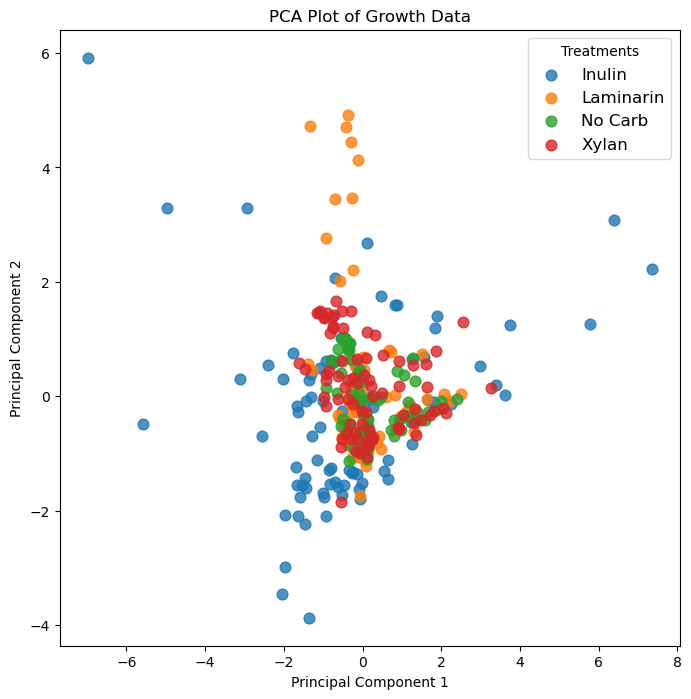

In [29]:
# Create a scatter plot
plt.figure(figsize=(8, 8))
for t in np.unique(treatments_df):
        plt.scatter(pc1_df[treatments_df == t], pc2_df[treatments_df == t], label=t, alpha=0.8, s=60)
    
plt.title('PCA Plot of Growth Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Treatments', loc='upper right', fontsize=12)
plt.show()

## K-means

In [30]:
warnings.filterwarnings('ignore')
n_kmeans = [2, 4, 5, 6, 7, 8, 9, 10]
clusters_kmeans = pd.DataFrame()
df_clusters_kmeans = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_kmeans:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(data_norm)
    clusters_kmeans['cluster_' + str(n)] = kmeans.fit_predict(data_norm)
    score_kmeans = silhouette_score(data_norm, kmeans.labels_)
    in_score = kmeans.inertia_
    print(f'KMeans with {n} clusters: Silhouette Score = {score_kmeans:.3f}, Inertia = {in_score:.3f}')
    df_clusters_kmeans['cluster_' + str(n)] = kmeans.labels_  # Agrega los clusters al dataframe original


df_clusters_kmeans
clusters_kmeans


KMeans with 2 clusters: Silhouette Score = 0.167, Inertia = 2925.973
KMeans with 4 clusters: Silhouette Score = 0.213, Inertia = 2366.119
KMeans with 5 clusters: Silhouette Score = 0.195, Inertia = 2126.638
KMeans with 6 clusters: Silhouette Score = 0.230, Inertia = 1856.104
KMeans with 7 clusters: Silhouette Score = 0.209, Inertia = 1613.511
KMeans with 8 clusters: Silhouette Score = 0.236, Inertia = 1480.353
KMeans with 9 clusters: Silhouette Score = 0.267, Inertia = 1269.736
KMeans with 10 clusters: Silhouette Score = 0.269, Inertia = 1200.959


cluster_2  cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  \
0            1          3          2          4          2          2   
1            1          3          2          4          2          2   
2            1          2          2          2          2          2   
3            1          3          2          4          2          2   
4            1          3          2          4          2          2   
..         ...        ...        ...        ...        ...        ...   
318          0          0          0          0          0          3   
319          1          3          4          4          4          1   
320          1          3          4          4          4          1   
321          1          3          4          4          4          1   
322          1          3          4          4          4          1   

     cluster_9  cluster_10  
0            2           3  
1            2           3  
2            2           3  
3            2           3  
4            1           3  
..         ...         ...  
318          3           9  
319          1           1  
320          1           3  
321          1           3  
322          1           3  

[323 rows x 8 columns]

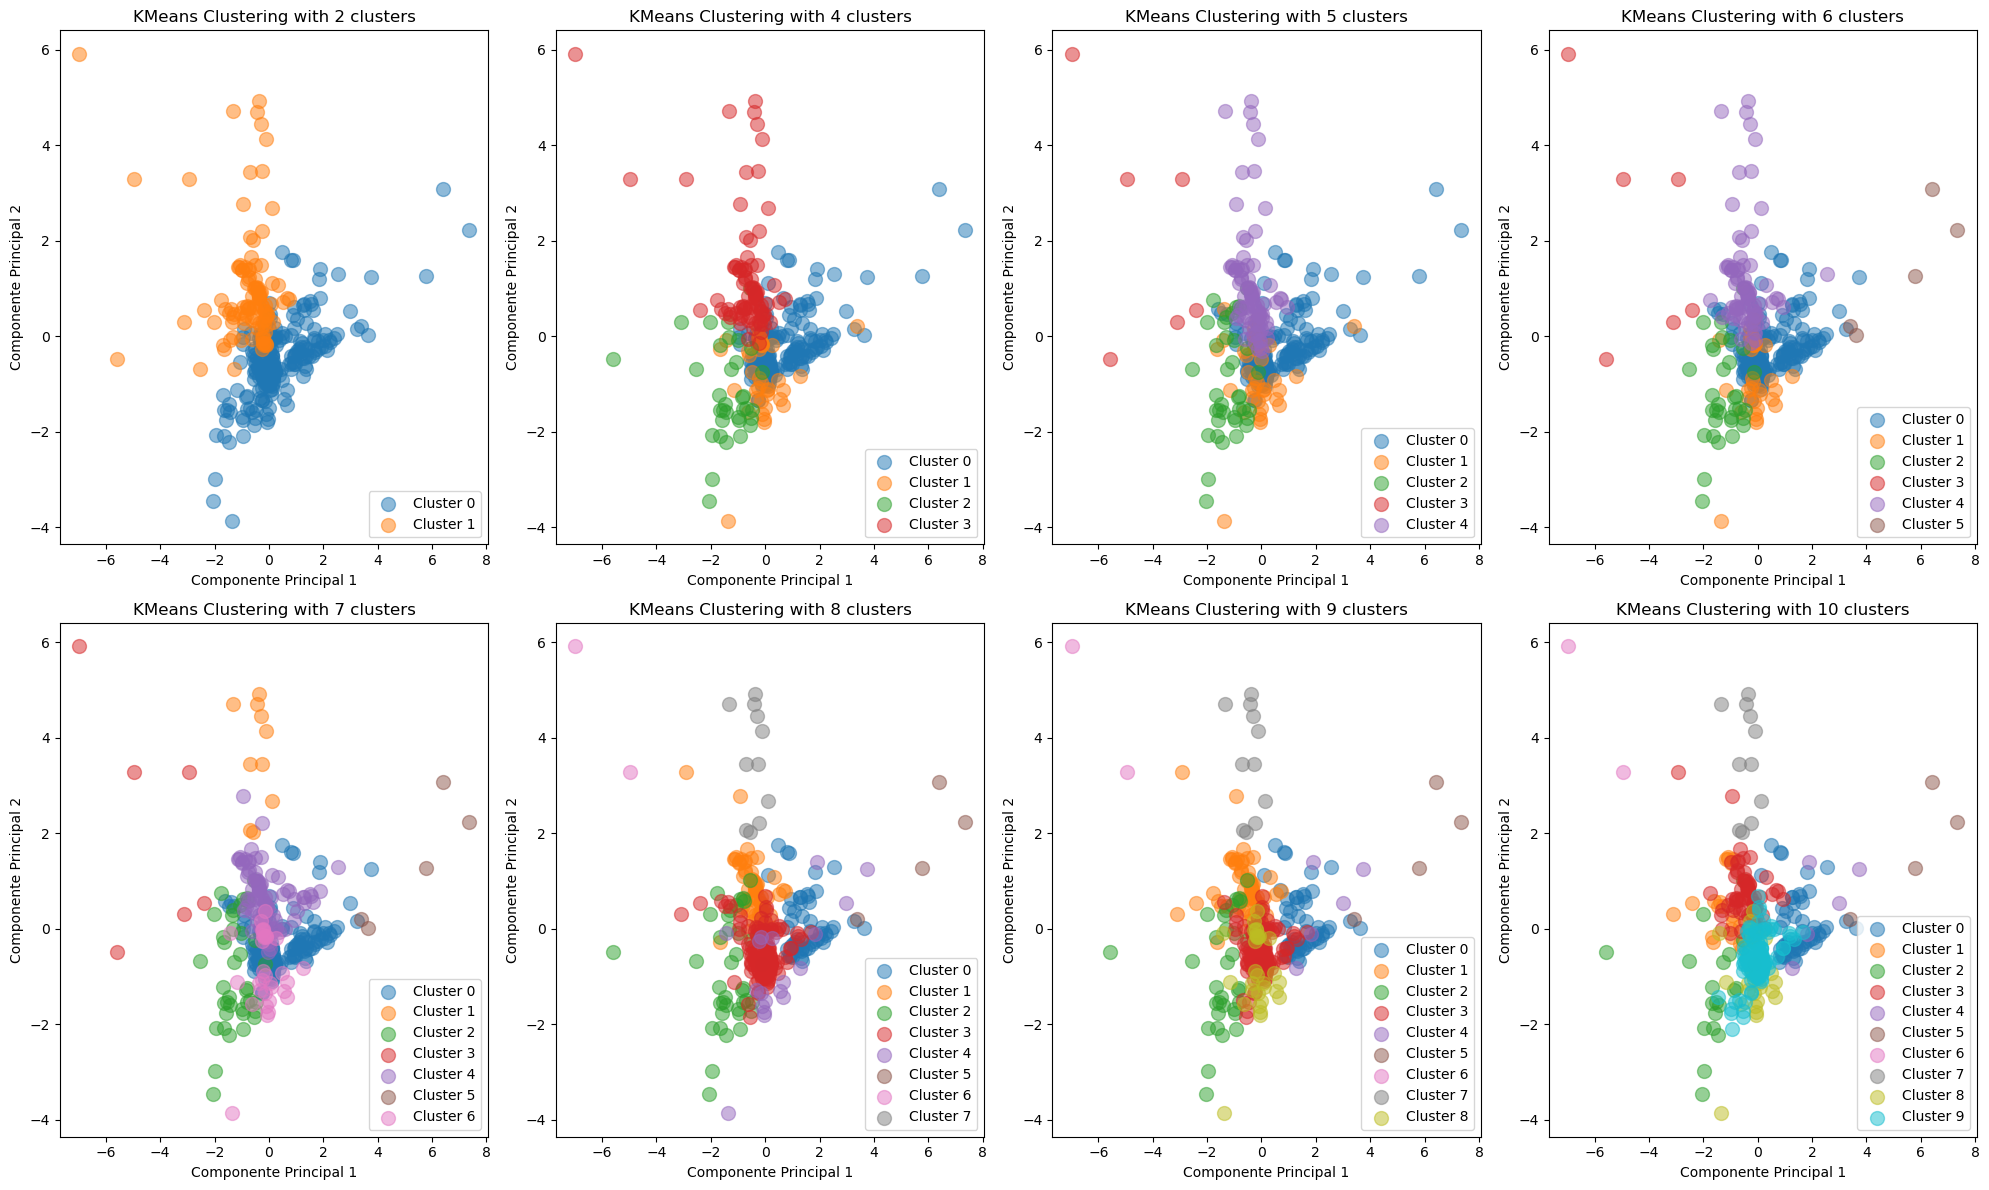

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))  
axs = axs.flatten()

for i, n in enumerate(n_kmeans):
    cluster = df_clusters_kmeans['cluster_' + str(n)] 
    for j in np.unique(cluster):
        axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.5, s=100)
    
    axs[i].set_title(f'KMeans Clustering with {n} clusters')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    axs[i].legend(loc='lower right')

plt.tight_layout()
plt.show()

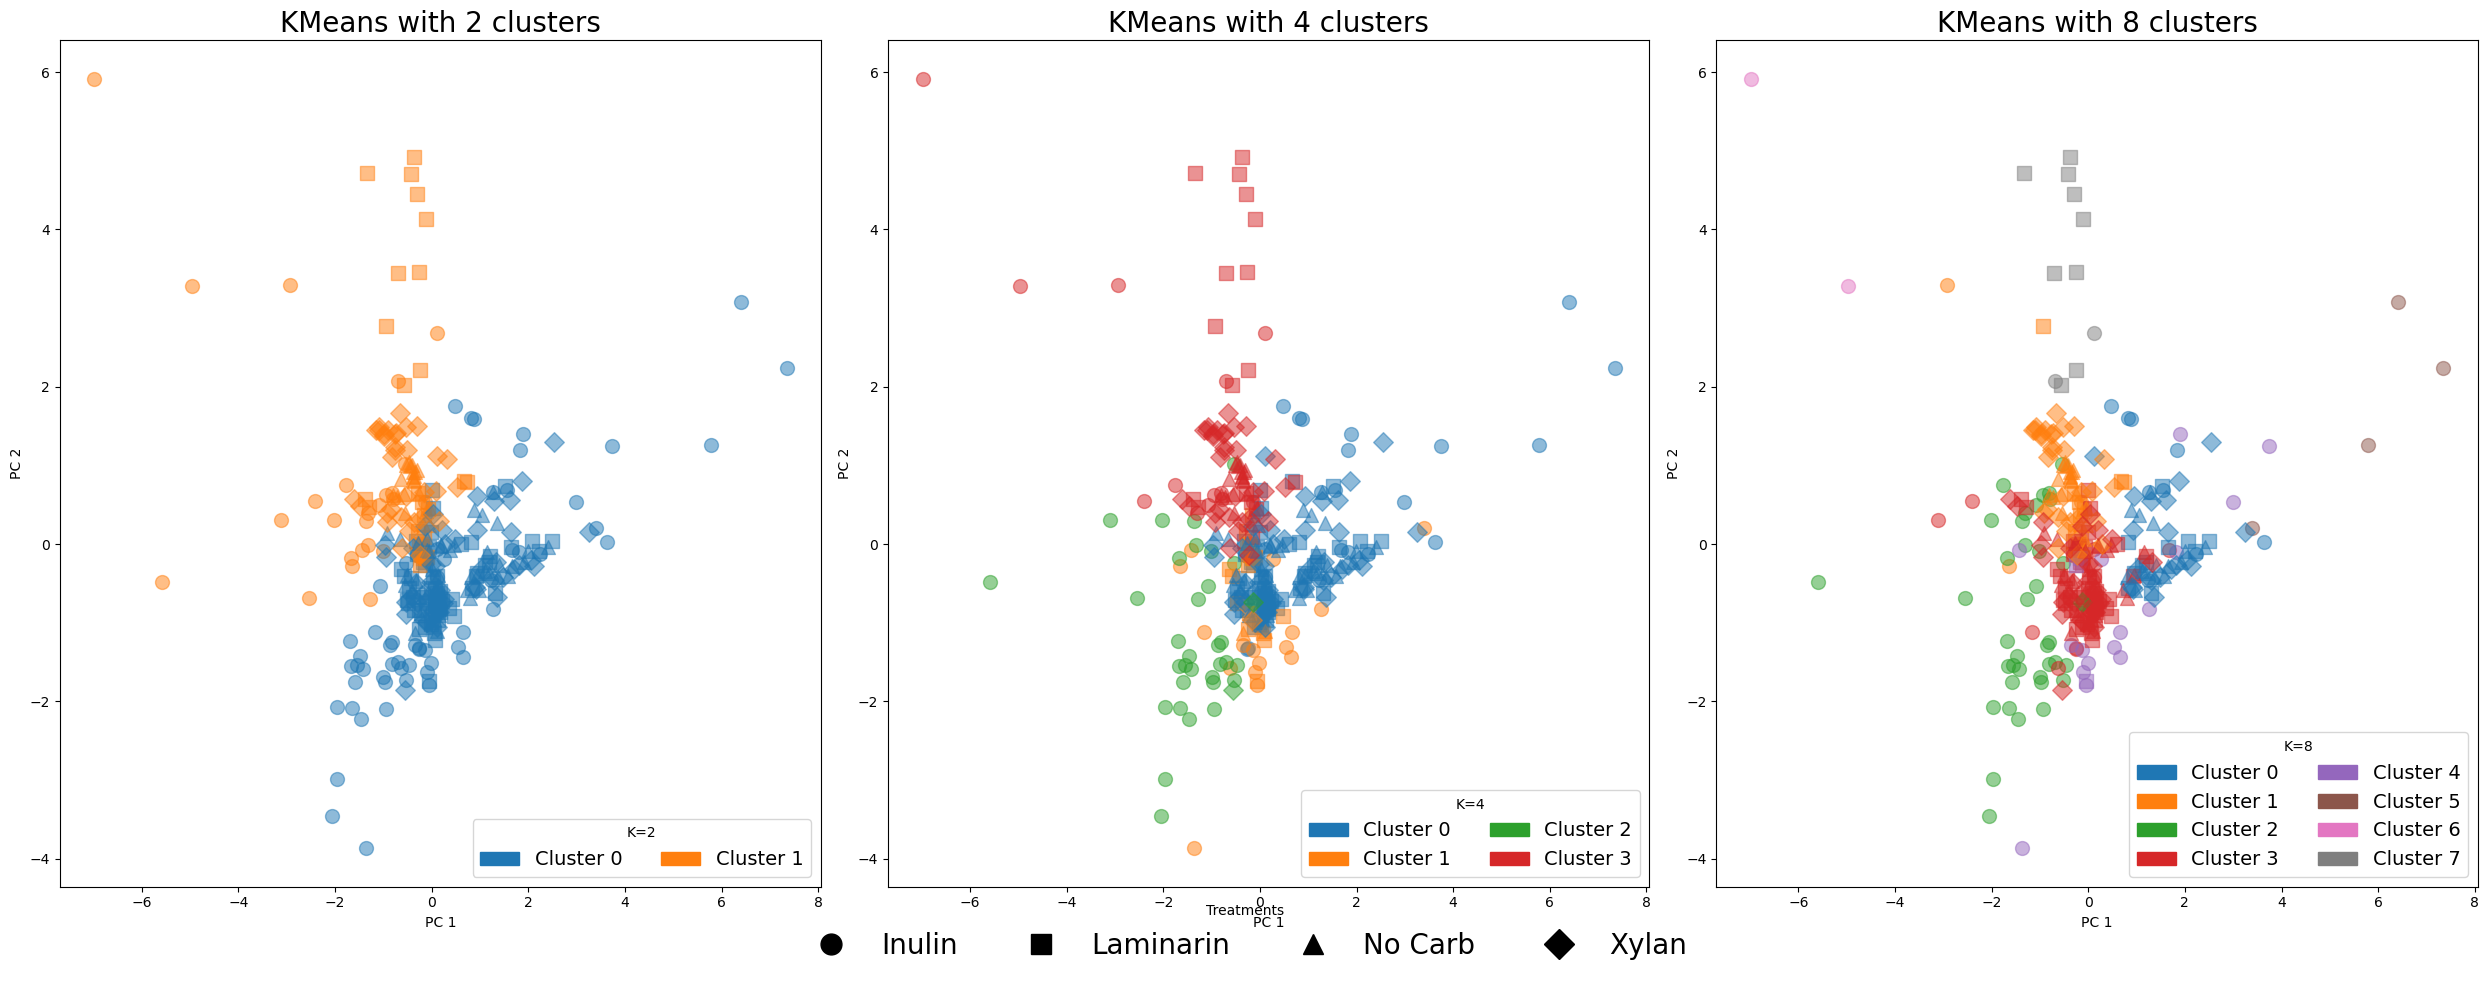

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
n_kmeans = [2, 4, 8]
# same treatment→marker mapping as before
marker_shapes = {'Inulin': 'o', 'Laminarin': 's', 'No Carb': '^', 'Xylan': 'D'}
treatments = list(marker_shapes.keys())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
axs = axs.flatten()

for i, k in enumerate(n_kmeans):
    cluster = df_clusters_kmeans[f'cluster_{k}']
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]

    # unique non-noise clusters
    uniq = sorted(np.unique(cluster))
    # assign a distinct color per cluster
    base_colors = plt.cm.tab10.colors
    cluster_to_color = {c: base_colors[idx % len(base_colors)]
                        for idx, c in enumerate(uniq)}

    # plot each treatment with its marker, colored by cluster
    for tr in treatments:
        m = marker_shapes[tr]
        mask_tr = df_clusters_kmeans['Treatments'] == tr
        for c in uniq:
            sel = (cluster == c) & mask_tr
            axs[i].scatter(pc1[sel], pc2[sel],
                           color=cluster_to_color[c],
                           marker=m,
                           s=100, alpha=0.5)

    # per‐subplot legend: clusters only (colors)
    handles = [Patch(color=cluster_to_color[c], label=f'Cluster {c}')
               for c in uniq]
    axs[i].legend(handles=handles,
                  title=f'K={k}',
                  loc='lower right',
                  fontsize=14,
                  markerscale=1.2,
                  ncol=2)

    axs[i].set_title(f'KMeans with {k} clusters', fontsize=20)
    axs[i].set_xlabel('PC 1')
    axs[i].set_ylabel('PC 2')

# leave space at bottom for the global legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# global legend for treatments (shapes only), centered below
handles_treat = [
    Line2D([0], [0],
           marker=marker_shapes[t], color='black',
           linestyle='None', markersize=15, label=t)
    for t in treatments
]
fig.legend(handles=handles_treat,
           title='Treatments',
           loc='lower center',
           bbox_to_anchor=(0.5, 0.01),
           ncol=len(treatments),
           frameon=False,
           fontsize=20,
           title_fontsize='medium')

plt.show()


## HDBSCAN

In [33]:
n_hdbscan = [2, 3, 4, 5, 6, 7, 8, 9, 10]
clusters_hdbscan = pd.DataFrame()
df_clusters_hbdscan = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_hdbscan:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=n, gen_min_span_tree=True)
    clusterer.fit(data_norm)
    clusters_hdbscan['cluster_' + str(n)] = clusterer.fit_predict(data_norm)
    score_hdbscaan = silhouette_score(data_norm, clusterer.fit_predict(data_norm))
    print(f'KMeans with {n} clusters: Silhouette Score = {score_kmeans:.3f}')
    df_clusters_hbdscan['cluster_' + str(n)] = clusterer.fit_predict(data_norm) # Agrega los clusters al dataframe original


df_clusters_hbdscan
# clusters_hdbscan

KMeans with 2 clusters: Silhouette Score = 0.269
KMeans with 3 clusters: Silhouette Score = 0.269
KMeans with 4 clusters: Silhouette Score = 0.269
KMeans with 5 clusters: Silhouette Score = 0.269
KMeans with 6 clusters: Silhouette Score = 0.269
KMeans with 7 clusters: Silhouette Score = 0.269
KMeans with 8 clusters: Silhouette Score = 0.269
KMeans with 9 clusters: Silhouette Score = 0.269
KMeans with 10 clusters: Silhouette Score = 0.269


PJ        BV        AC        DP        BT        DL        BH  \
0    0.003724  0.196078  0.183944  0.448211  0.062132  0.696451  0.055866   
1    0.002106  0.065855  0.199391  0.474670  0.045631  0.770538  0.063348   
2    0.001673  0.076443  0.247271  0.398965  0.076639  0.802188  0.012637   
3    0.001256  0.101921  0.208160  0.413006  0.106440  0.640984  0.019463   
4    0.000191  0.492097  0.139730  0.361517  0.026856  0.718147  0.063573   
..        ...       ...       ...       ...       ...       ...       ...   
318  0.000000  0.204577  0.001275  0.000000  0.175936  0.066432  0.000000   
319  0.000000  0.257250 -0.001023  0.303211  0.000000  0.066612  0.026547   
320  0.065944  0.000000 -0.000310  0.477206  0.000000  0.000000  0.015235   
321  0.057380  0.000000  0.000000  0.384680  0.000000  0.082534  0.024513   
322  0.022272  0.391865  0.002252  0.282982  0.122931  0.048299  0.000000   

           BP        CS        EL Treatments  cluster_2  cluster_3  cluster_4  \
0    0.046191  0.005828  0.065757     Inulin          4          3          2   
1    0.083587  0.004895  0.109176     Inulin          4          3          2   
2    0.042206  0.004290  0.079048     Inulin          4          3          2   
3    0.038375  0.004913  0.117527     Inulin          4          3          2   
4    0.002107  0.006184  0.115641     Inulin          4          3         -1   
..        ...       ...       ...        ...        ...        ...        ...   
318  0.000000  0.000000  0.000000      Xylan         30         13         -1   
319  0.016615  0.004261  0.224394      Xylan         -1          9          6   
320  0.051420  0.006205  0.105500      Xylan         -1         -1         -1   
321  0.048725  0.004495  0.187006      Xylan         -1         -1         -1   
322  0.000000  0.000000  0.000000      Xylan         -1         -1         -1   

     cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  cluster_10  
0            0          0          0          0         -1          -1  
1            0          0          0          0         -1          -1  
2            0          0          0          0         -1          -1  
3            0          0          0          0         -1          -1  
4           -1         -1         -1         -1         -1          -1  
..         ...        ...        ...        ...        ...         ...  
318          2          2          2          2          1           1  
319          2          2          2          2          1           1  
320          2          2          2          2          1           1  
321          2          2          2          2          1           1  
322         -1         -1         -1         -1         -1          -1  

[323 rows x 20 columns]

IndexError: index 8 is out of bounds for axis 0 with size 8

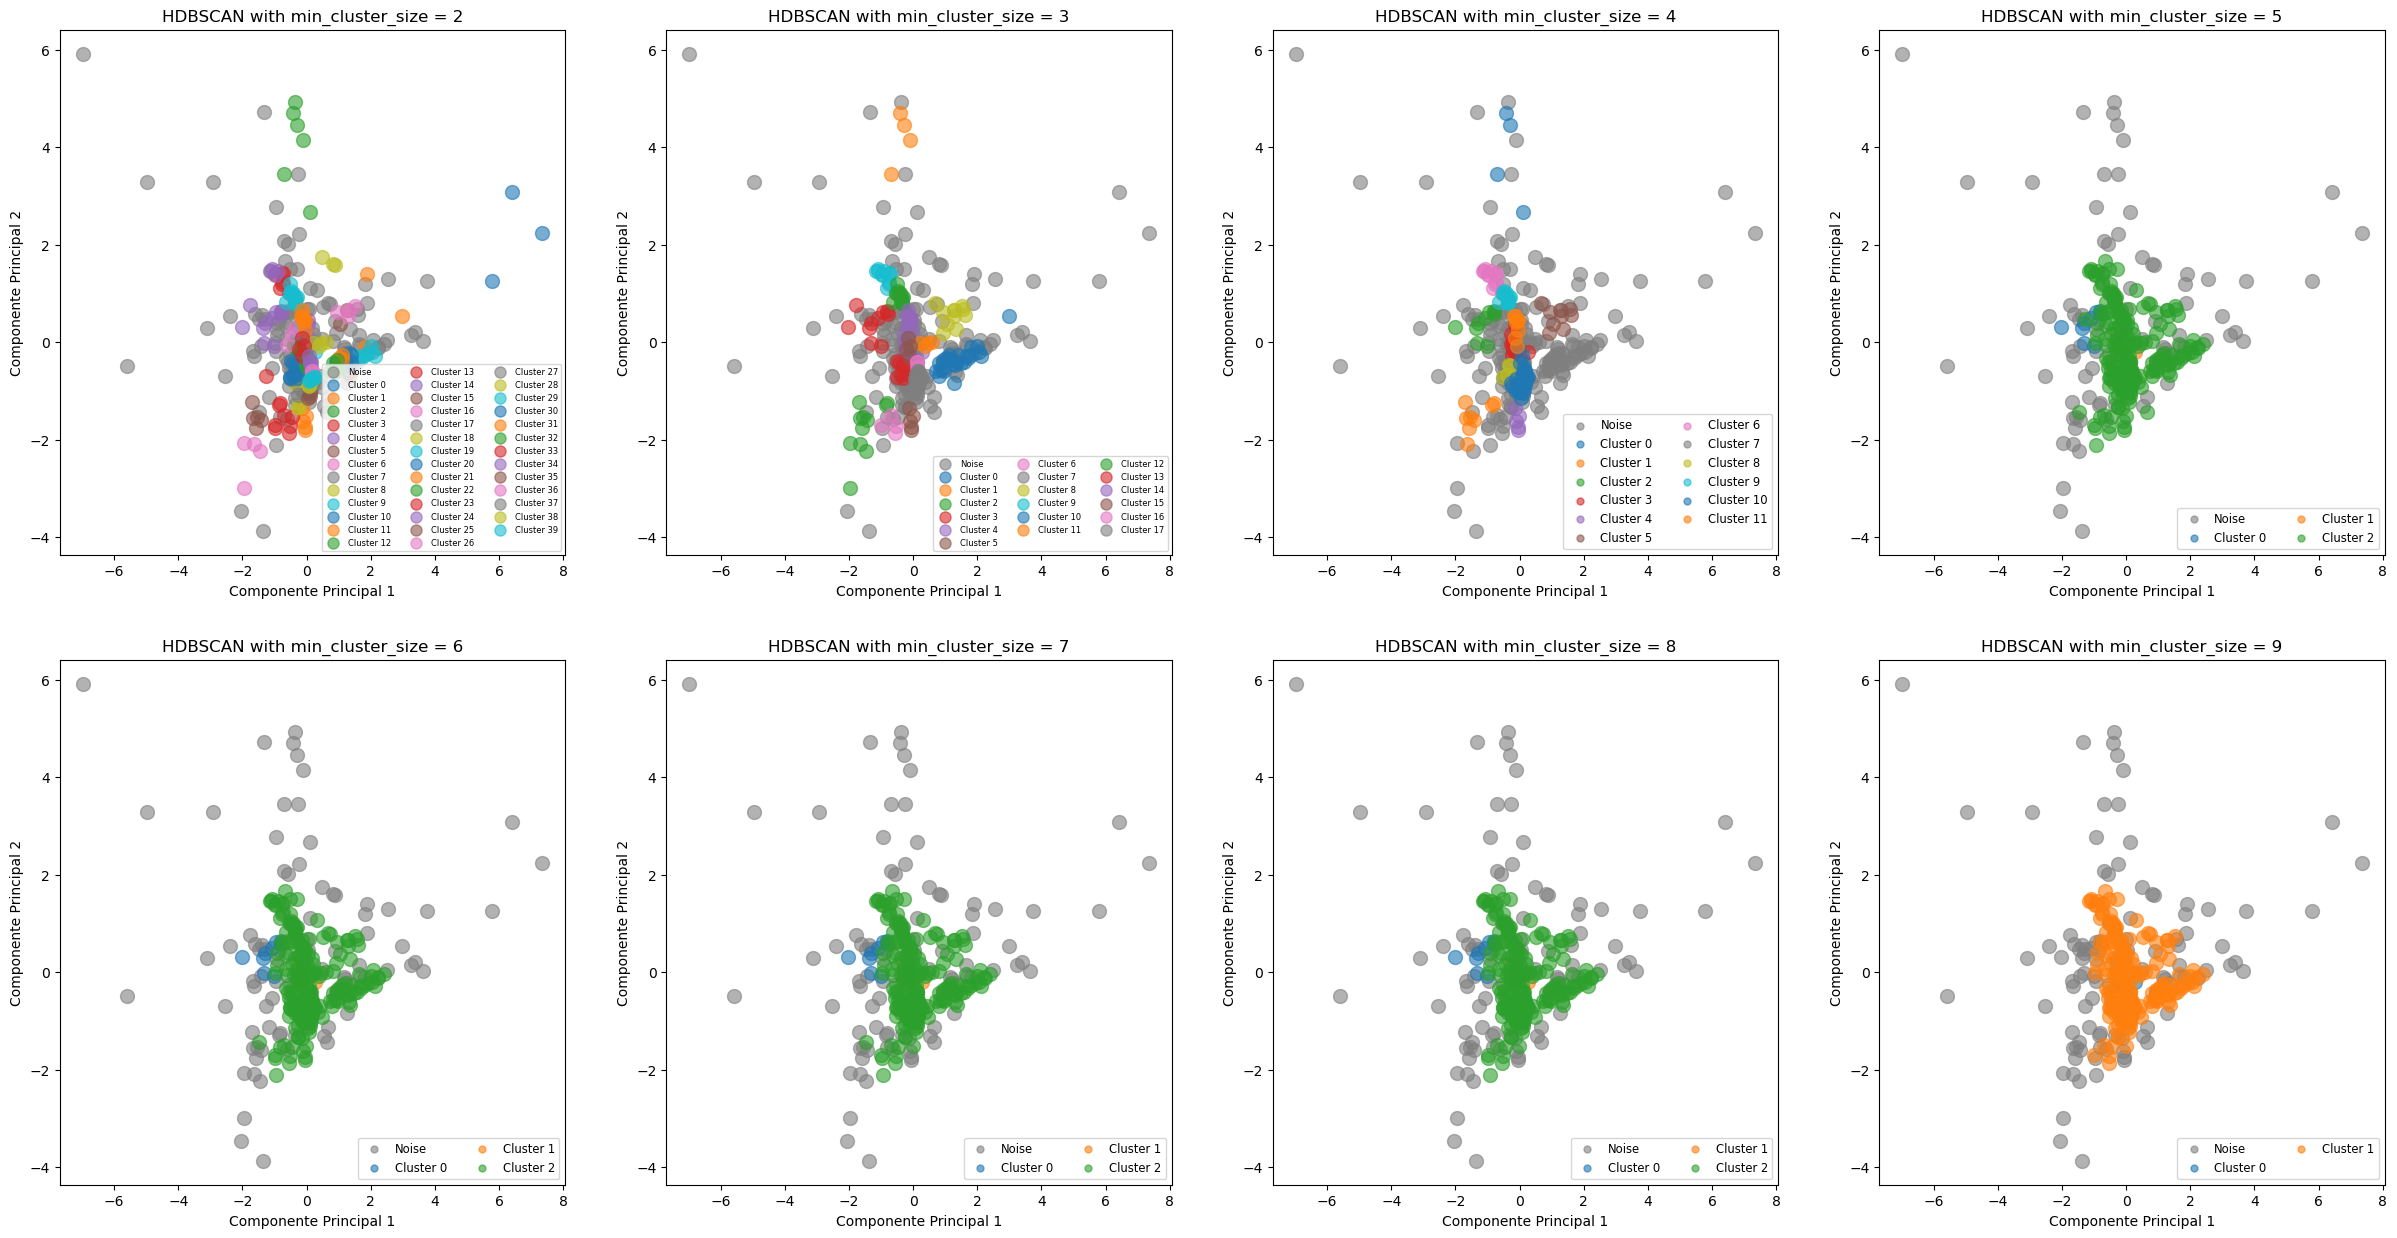

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))  
axs = axs.flatten()

for i, n in enumerate(n_hdbscan):
    cluster = df_clusters_hbdscan['cluster_' + str(n)] 
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    for j in np.unique(cluster):
        if j != -1: 
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label='Noise', alpha=0.6, s=100, color='gray')

    axs[i].set_title(f'HDBSCAN with min_cluster_size = {n}')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    if np.unique(cluster).size > 15:
        axs[i].legend(loc='lower right', fontsize=6, markerscale=0.8, ncol=3)
    else:
        axs[i].legend(loc='lower right', fontsize='small', markerscale=0.5, ncol=2)

plt.tight_layout()

plt.show()

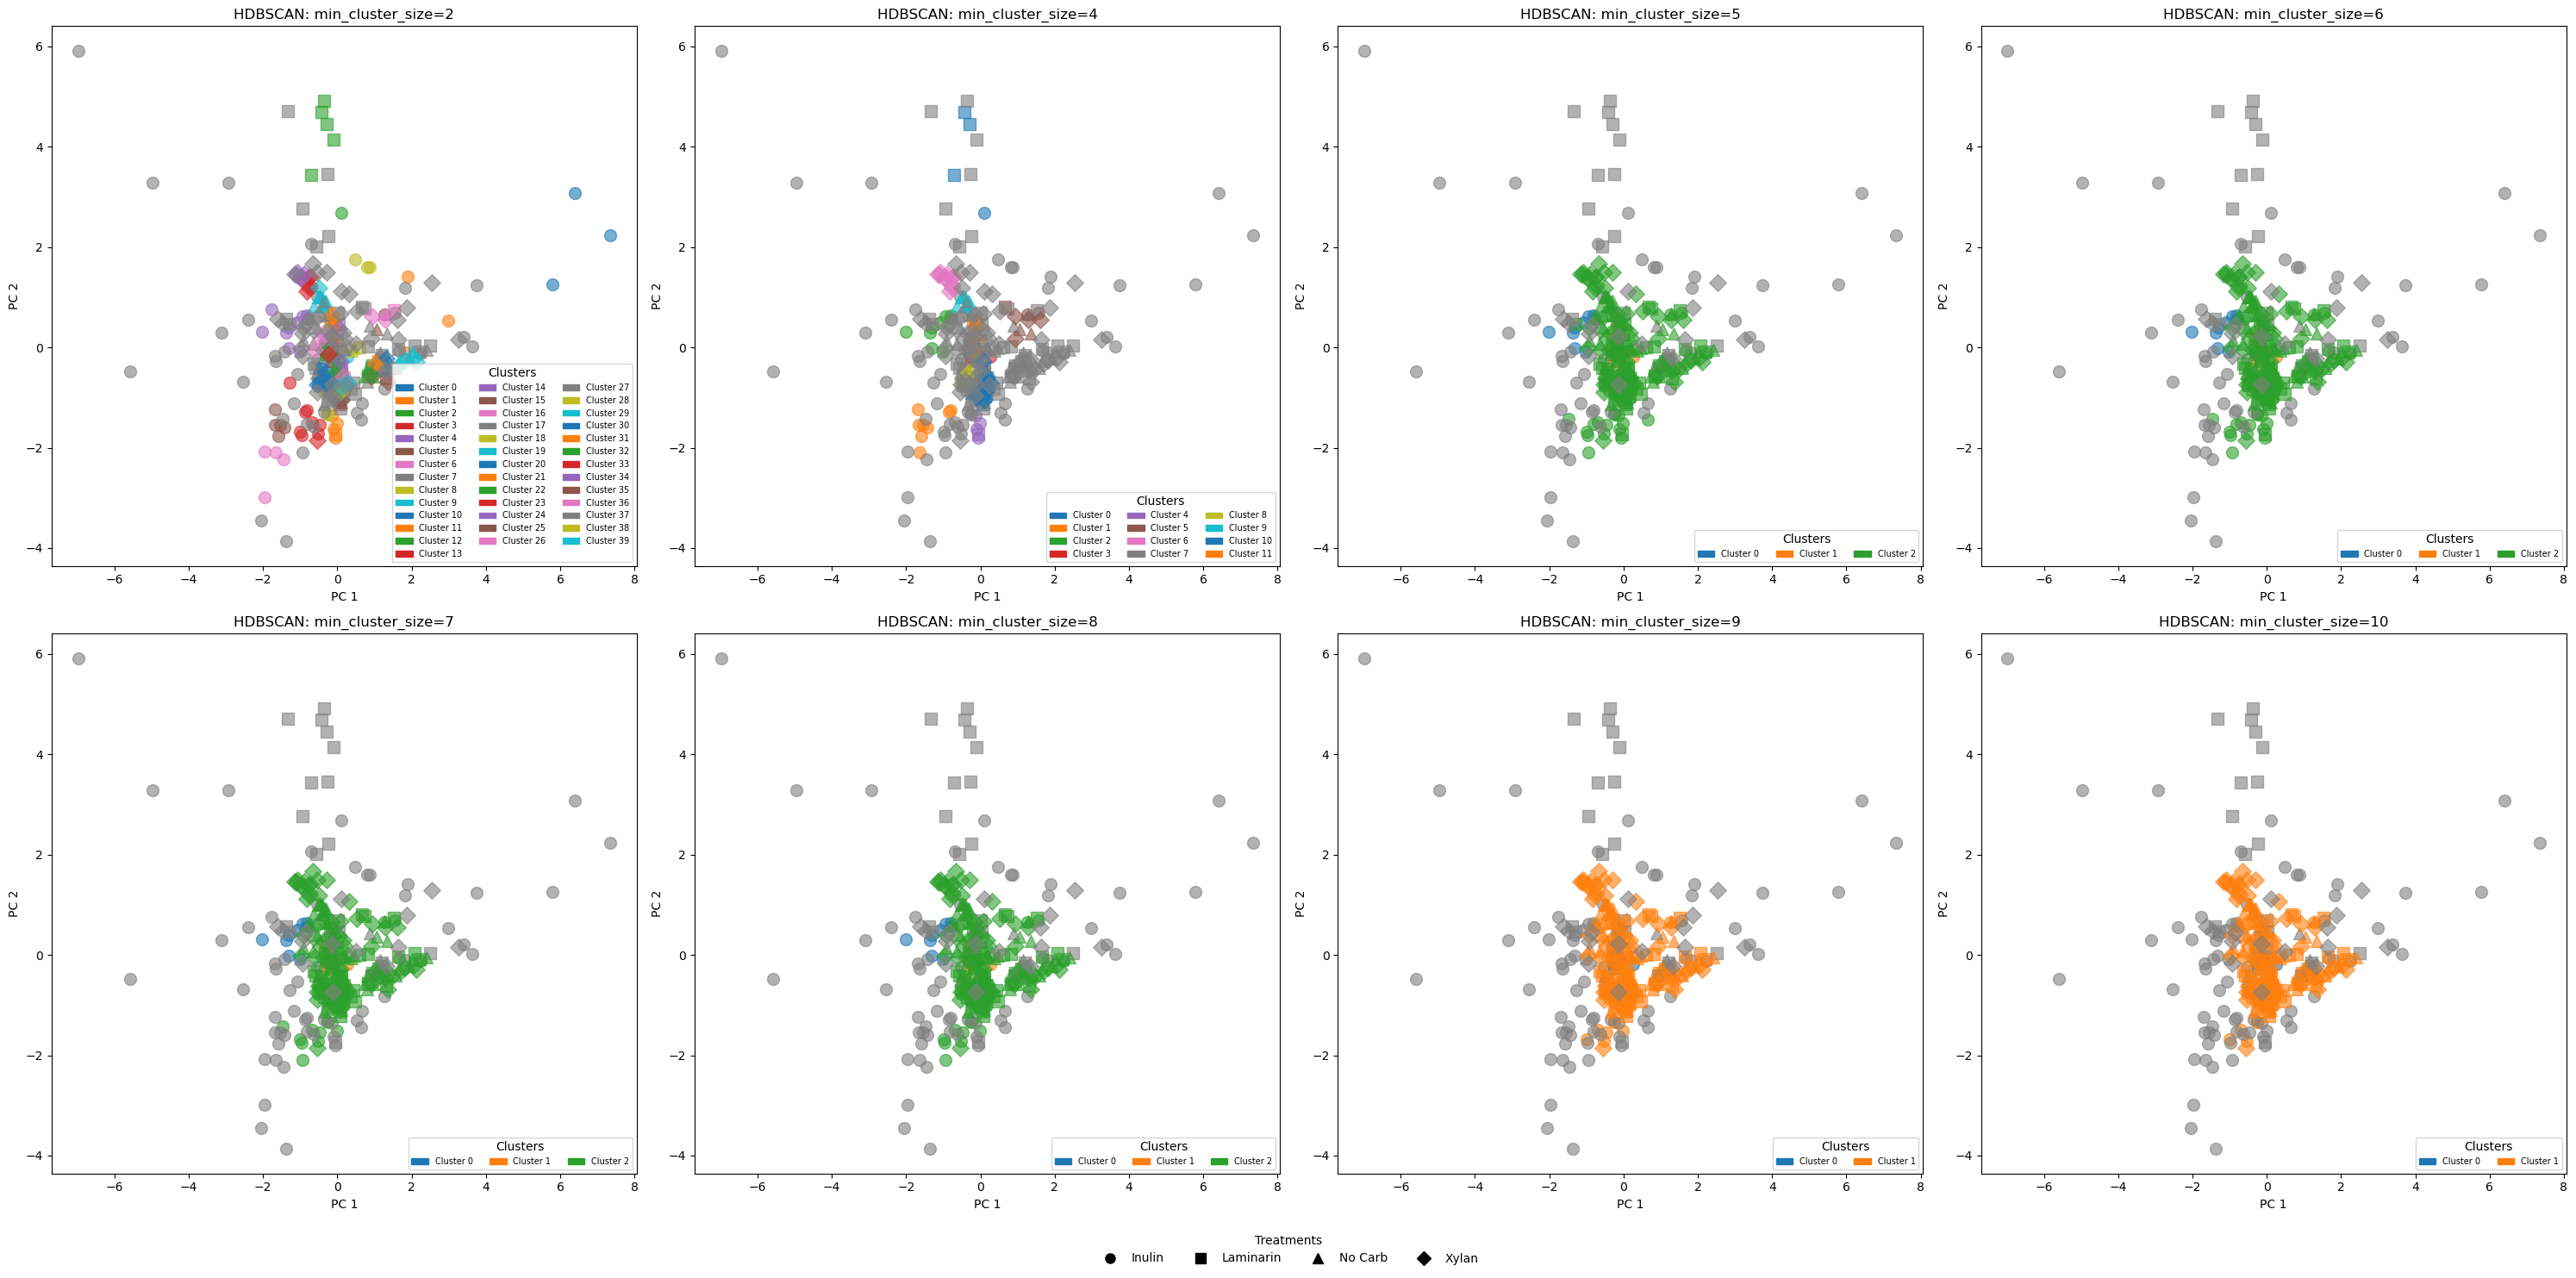

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

marker_shapes = {'Inulin': 'o', 'Laminarin': 's', 'No Carb': '^', 'Xylan': 'D'}
treatments = list(marker_shapes.keys())

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
axs = axs.flatten()

for i, n in enumerate(n_hdbscan):
    cluster = df_clusters_hbdscan[f'cluster_{n}']
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]

    # determine unique clusters (excluding noise)
    uniq = sorted([c for c in np.unique(cluster) if c != -1])
    # map each cluster to a distinct color
    base_colors = plt.cm.tab10.colors
    cluster_to_color = {cl: base_colors[idx % len(base_colors)]
                        for idx, cl in enumerate(uniq)}
    # plot all points
    for treatment in treatments:
        m = marker_shapes[treatment]
        mask_t = df_clusters_hbdscan['Treatments'] == treatment
        for cl in uniq:
            sel = (cluster == cl) & mask_t
            axs[i].scatter(pc1[sel], pc2[sel],
                            color=cluster_to_color[cl],
                            marker=m,
                            s=100, alpha=0.6)
        # noise
        sel_noise = (cluster == -1) & mask_t
        axs[i].scatter(pc1[sel_noise], pc2[sel_noise],
                        color='gray',
                        marker=m,
                        s=100, alpha=0.6 )

    # build a legend for clusters (colors only)
    handles_clusters = [
        Patch(color=cluster_to_color[cl], label=f'Cluster {cl}')
        for cl in uniq
    ]
    if -1 in cluster:
        handles_clusters.append(Patch(color='gray', label='Noise'))
    axs[i].legend(handles=handles_clusters,
                    title='Clusters',
                    loc='lower right',
                    fontsize=7,
                    markerscale=1,
                    ncol=3)

    axs[i].set_title(f'HDBSCAN: min_cluster_size={n}')
    axs[i].set_xlabel('PC 1')
    axs[i].set_ylabel('PC 2')

plt.tight_layout(rect=[0, 0.05, 1, 1])   # leave room at the bottom for the legend

# add a global legend for treatments (shapes only), centered at the bottom
handles_treat = [
    Line2D([0], [0],
            marker=marker_shapes[t], color='black',
            linestyle='None', markersize=8, label=t)
    for t in treatments
]
fig.legend(handles=handles_treat,
            title='Treatments',
            loc='lower center',
            ncol=len(treatments),
            bbox_to_anchor=(0.5, 0.01),
            frameon=False,
            fontsize='medium',
            title_fontsize='medium')


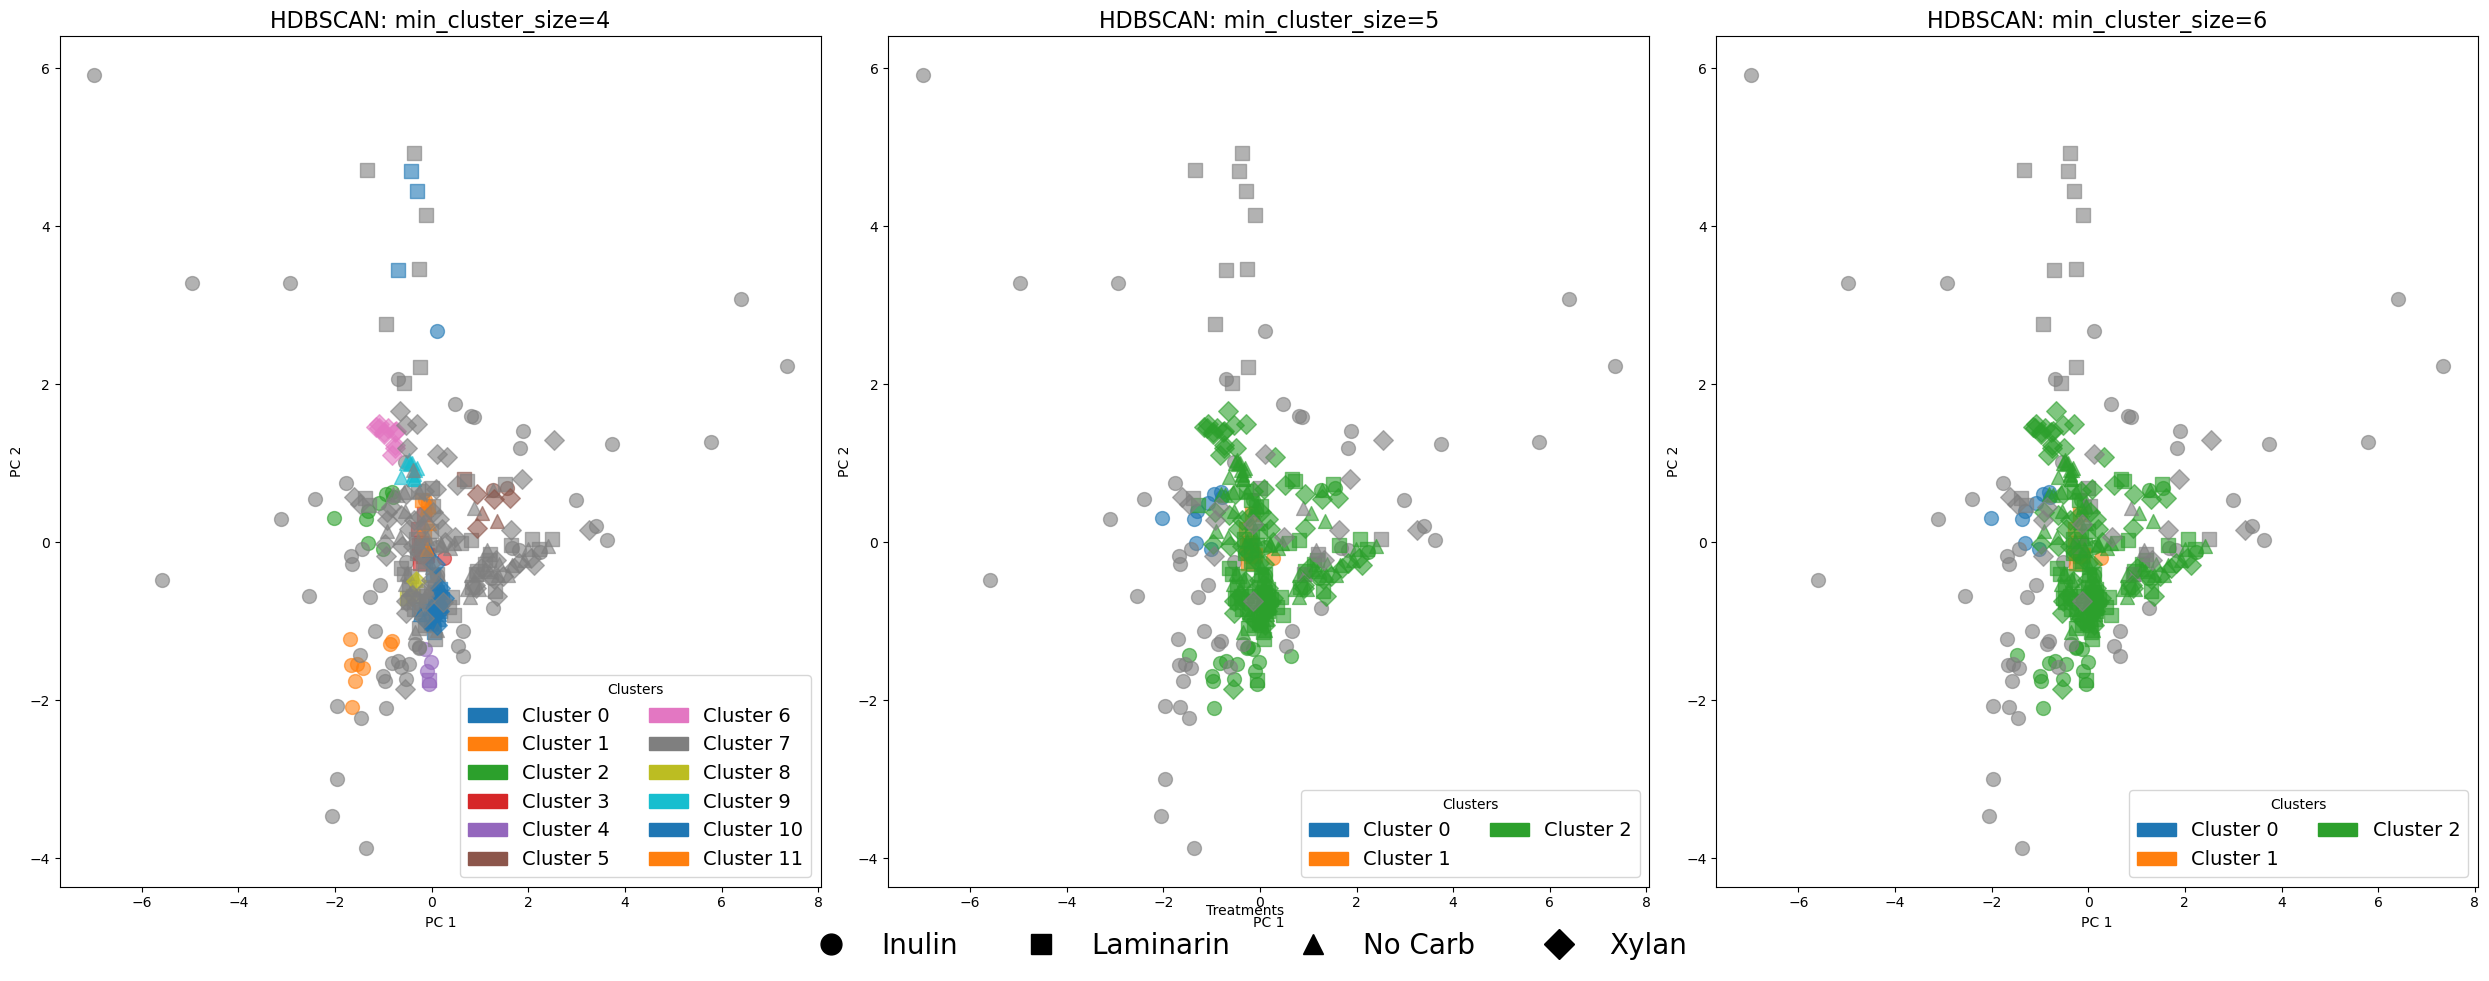

In [ ]:
n_hdbscan = [4, 5, 6]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

marker_shapes = {'Inulin': 'o', 'Laminarin': 's', 'No Carb': '^', 'Xylan': 'D'}
treatments = list(marker_shapes.keys())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
axs = axs.flatten()

for i, n in enumerate(n_hdbscan):
    cluster = df_clusters_hbdscan[f'cluster_{n}']
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]

    # determine unique clusters (excluding noise)
    uniq = sorted([c for c in np.unique(cluster) if c != -1])
    # map each cluster to a distinct color
    base_colors = plt.cm.tab10.colors
    cluster_to_color = {cl: base_colors[idx % len(base_colors)]
                        for idx, cl in enumerate(uniq)}
    # plot all points
    for treatment in treatments:
        m = marker_shapes[treatment]
        mask_t = df_clusters_hbdscan['Treatments'] == treatment
        for cl in uniq:
            sel = (cluster == cl) & mask_t
            axs[i].scatter(pc1[sel], pc2[sel],
                            color=cluster_to_color[cl],
                            marker=m,
                            s=100, alpha=0.6)
        # noise
        sel_noise = (cluster == -1) & mask_t
        axs[i].scatter(pc1[sel_noise], pc2[sel_noise],
                        color='gray',
                        marker=m,
                        s=100, alpha=0.6 )

    # build a legend for clusters (colors only)
    handles_clusters = [
        Patch(color=cluster_to_color[cl], label=f'Cluster {cl}')
        for cl in uniq
    ]
    if -1 in cluster:
        handles_clusters.append(Patch(color='gray', label='Noise'))
    axs[i].legend(handles=handles_clusters,
                    title='Clusters',
                    loc='lower right',
                    fontsize=14,
                    markerscale=1,
                    ncol=2)

    axs[i].set_title(f'HDBSCAN: min_cluster_size={n}', fontsize=16)
    axs[i].set_xlabel('PC 1')
    axs[i].set_ylabel('PC 2')

plt.tight_layout(rect=[0, 0.05, 1, 1])   # leave room at the bottom for the legend

# add a global legend for treatments (shapes only), centered at the bottom
handles_treat = [
    Line2D([0], [0],
            marker=marker_shapes[t], color='black',
            linestyle='None', markersize=15, label=t)
    for t in treatments
]
fig.legend(handles=handles_treat,
            title='Treatments',
            loc='lower center',
            ncol=len(treatments),
            bbox_to_anchor=(0.5, 0.01),
            frameon=False,
            fontsize=20,
            title_fontsize='medium')


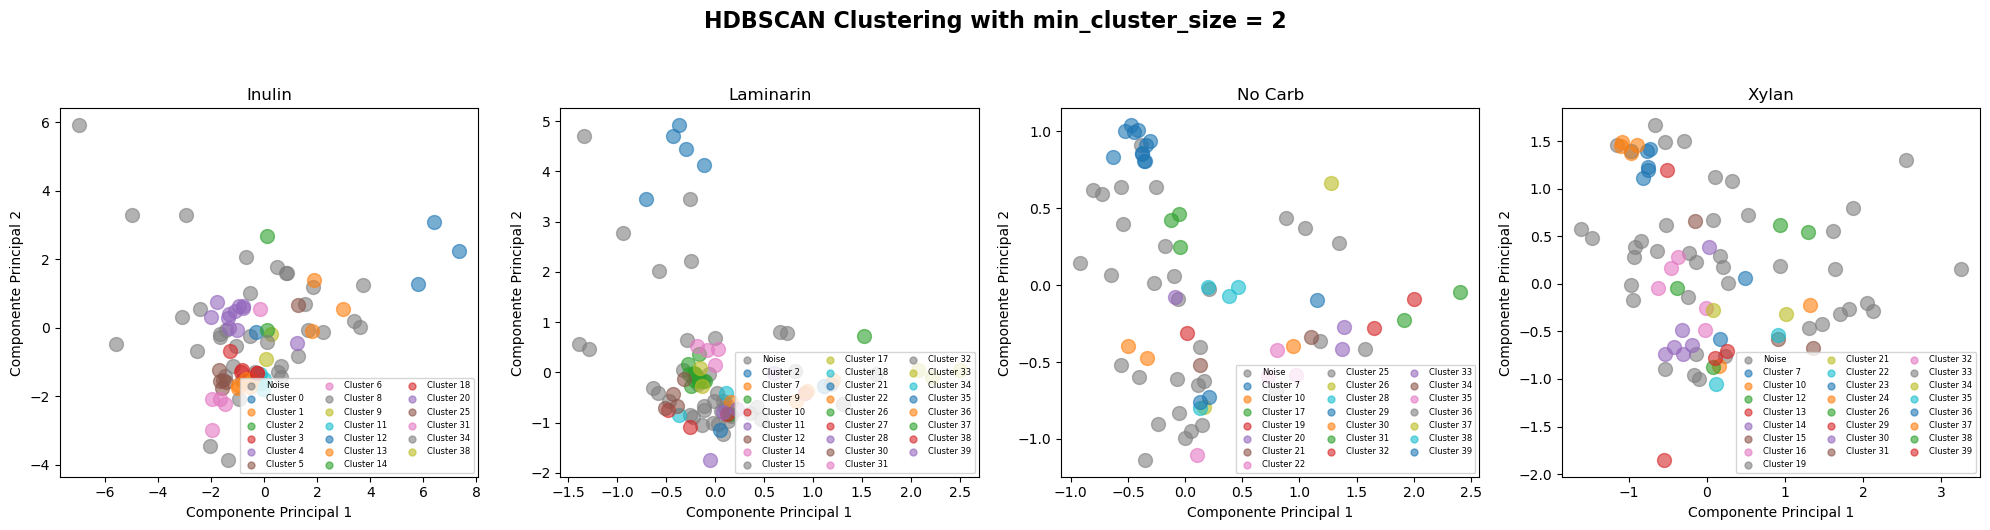

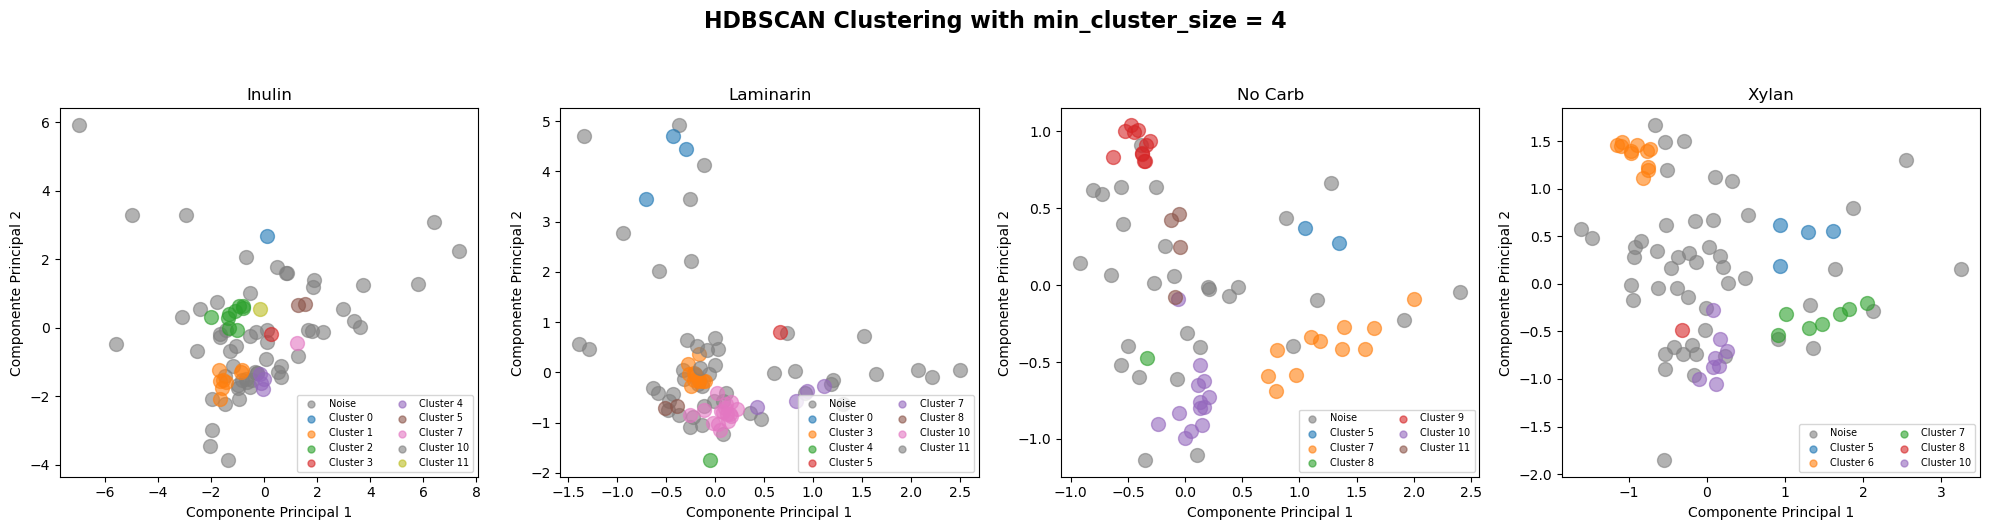

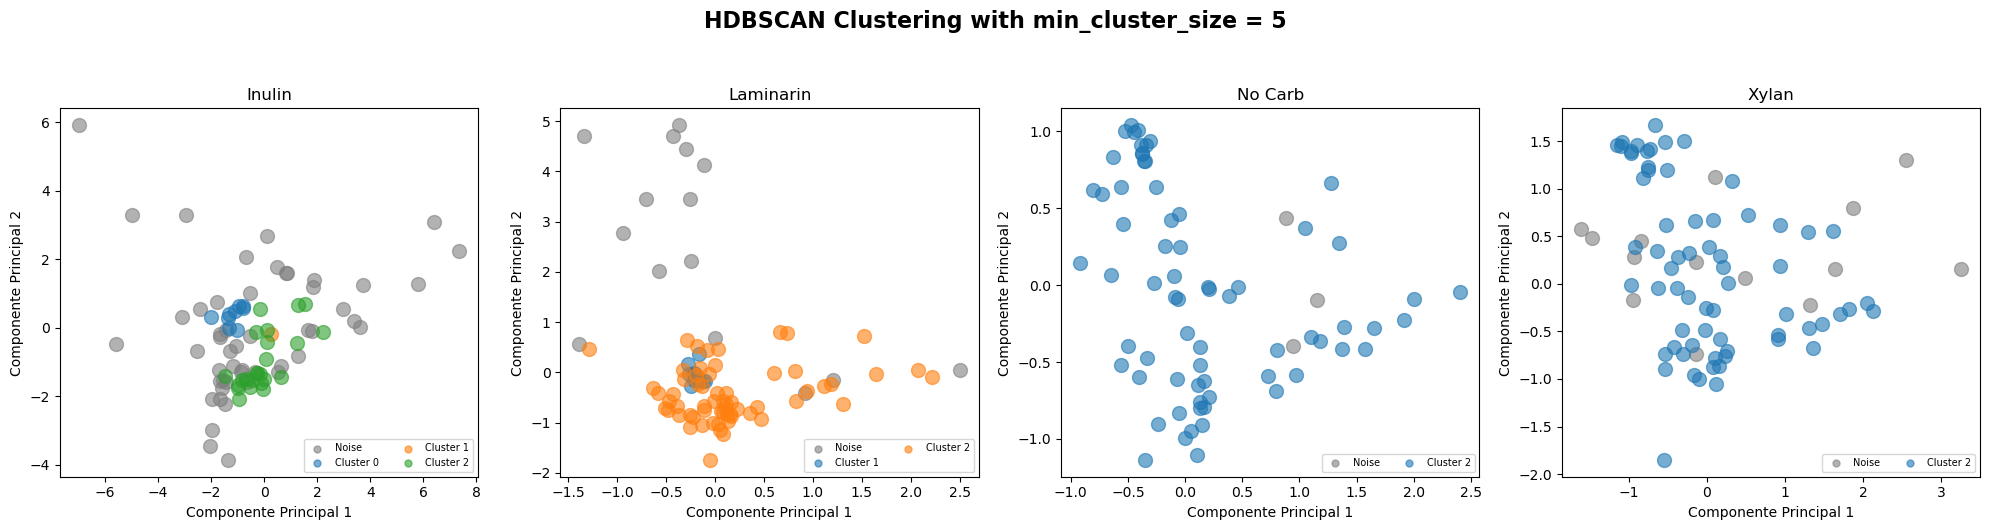

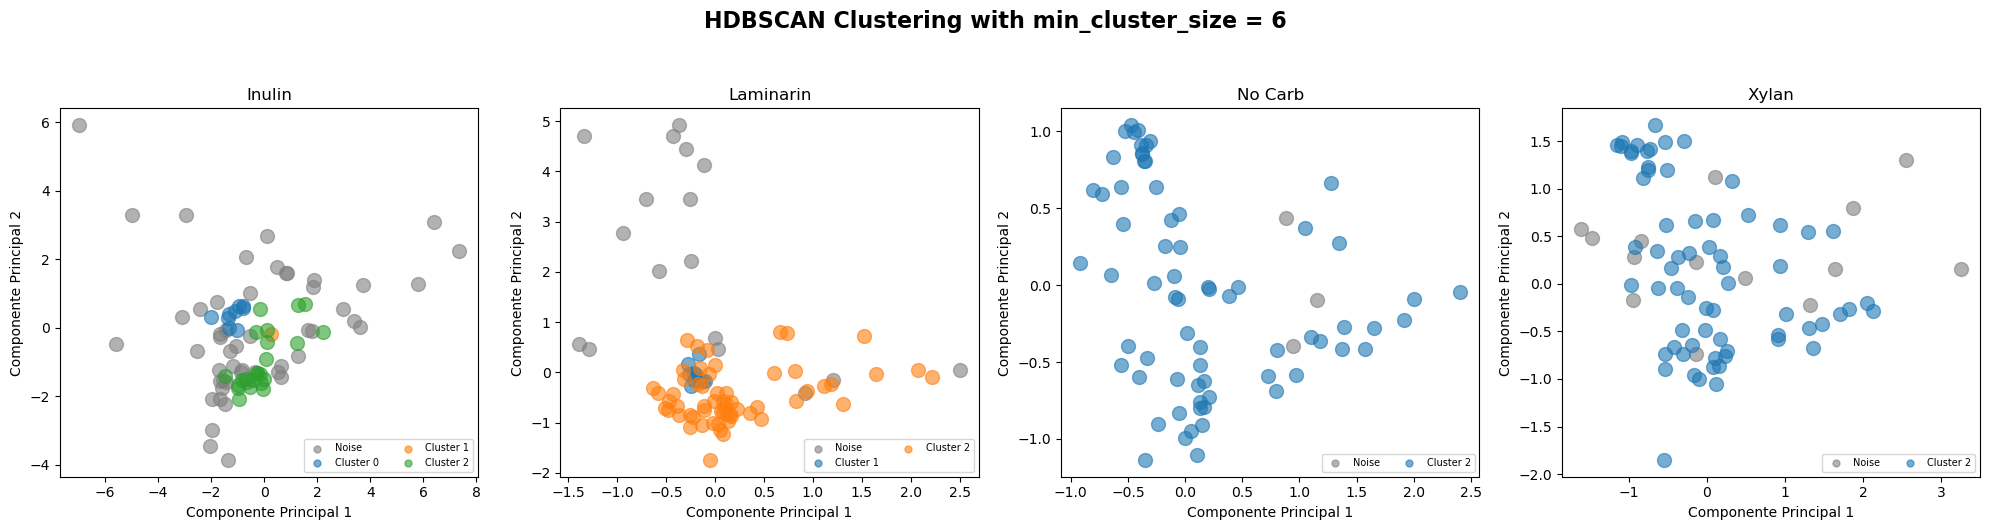

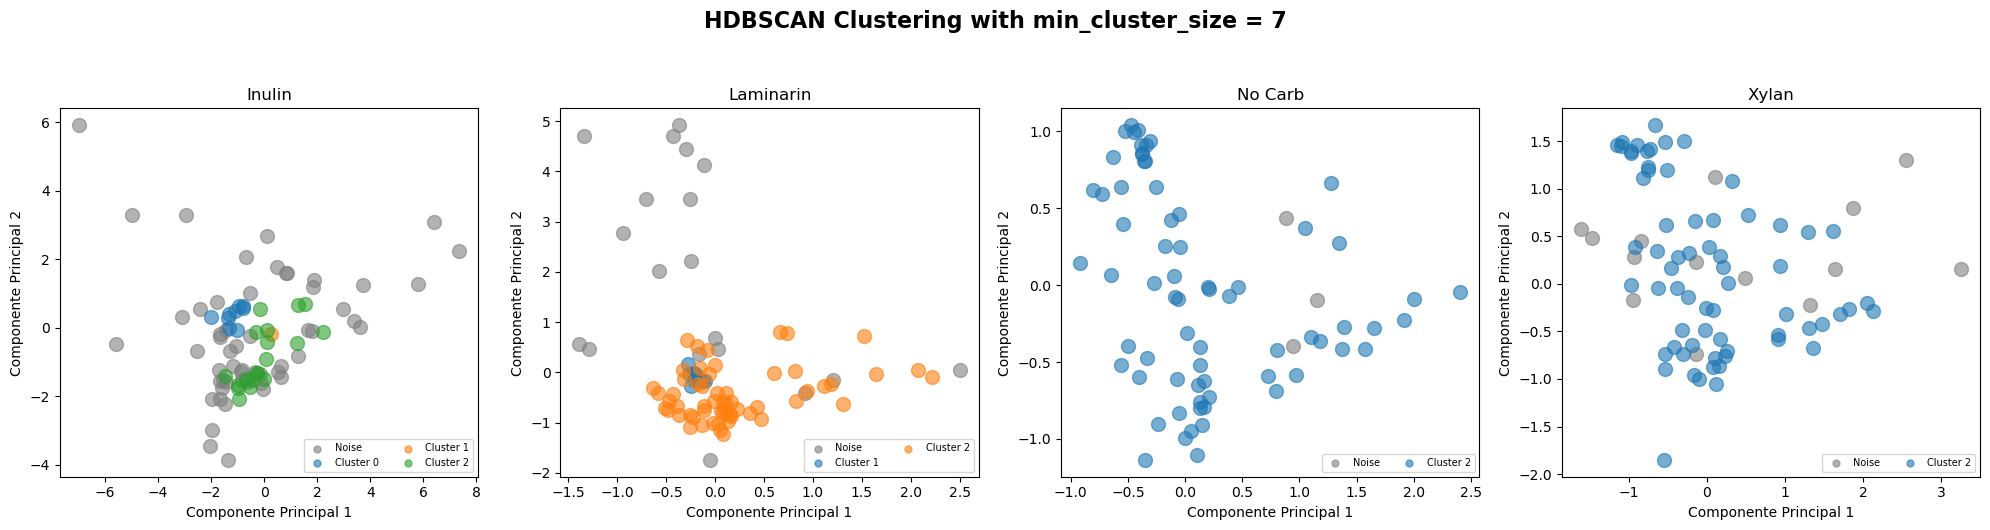

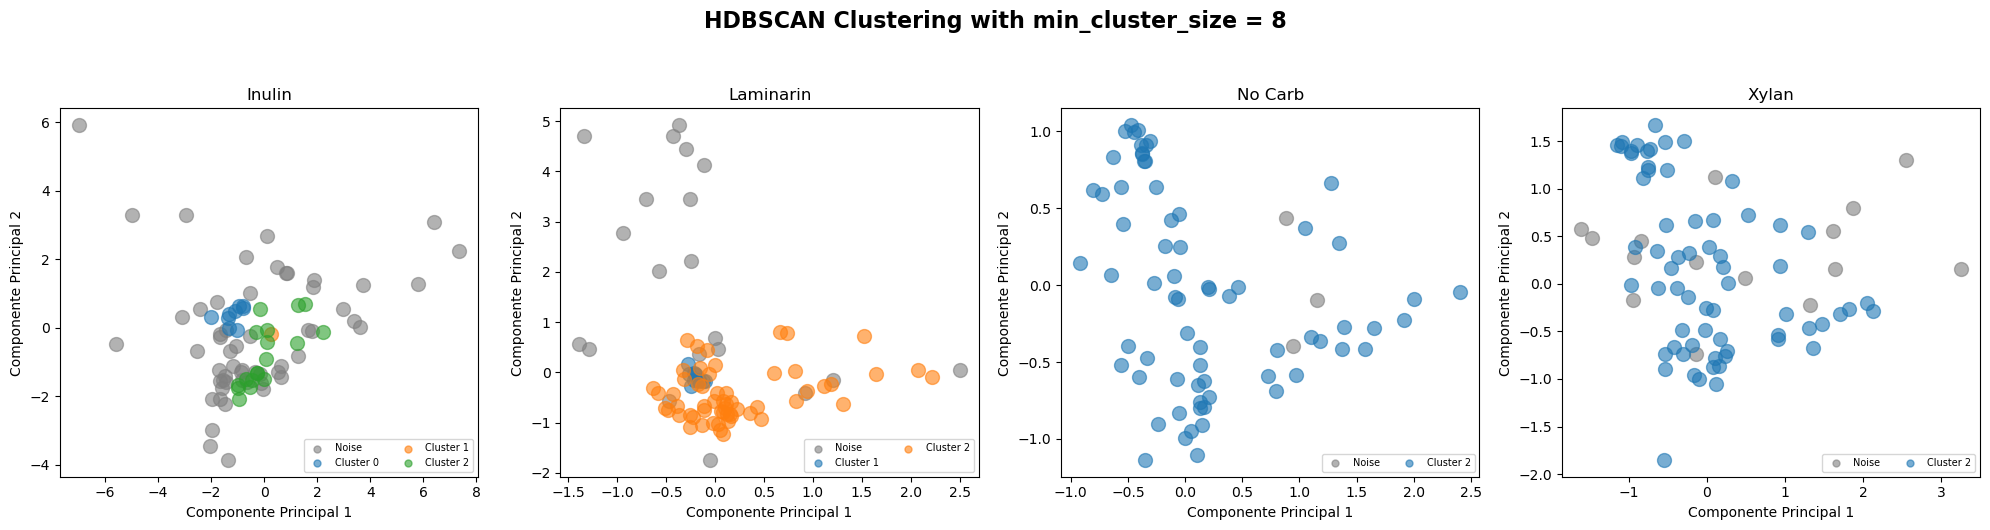

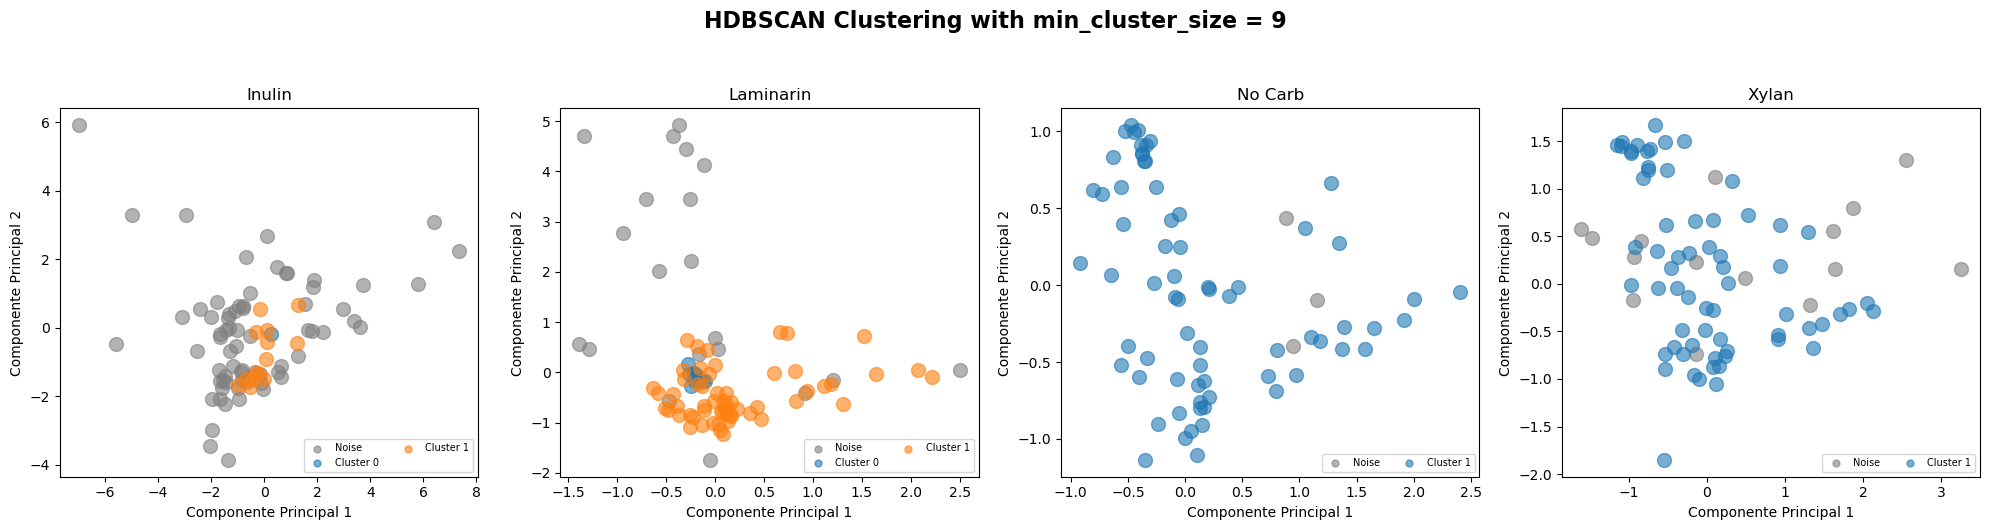

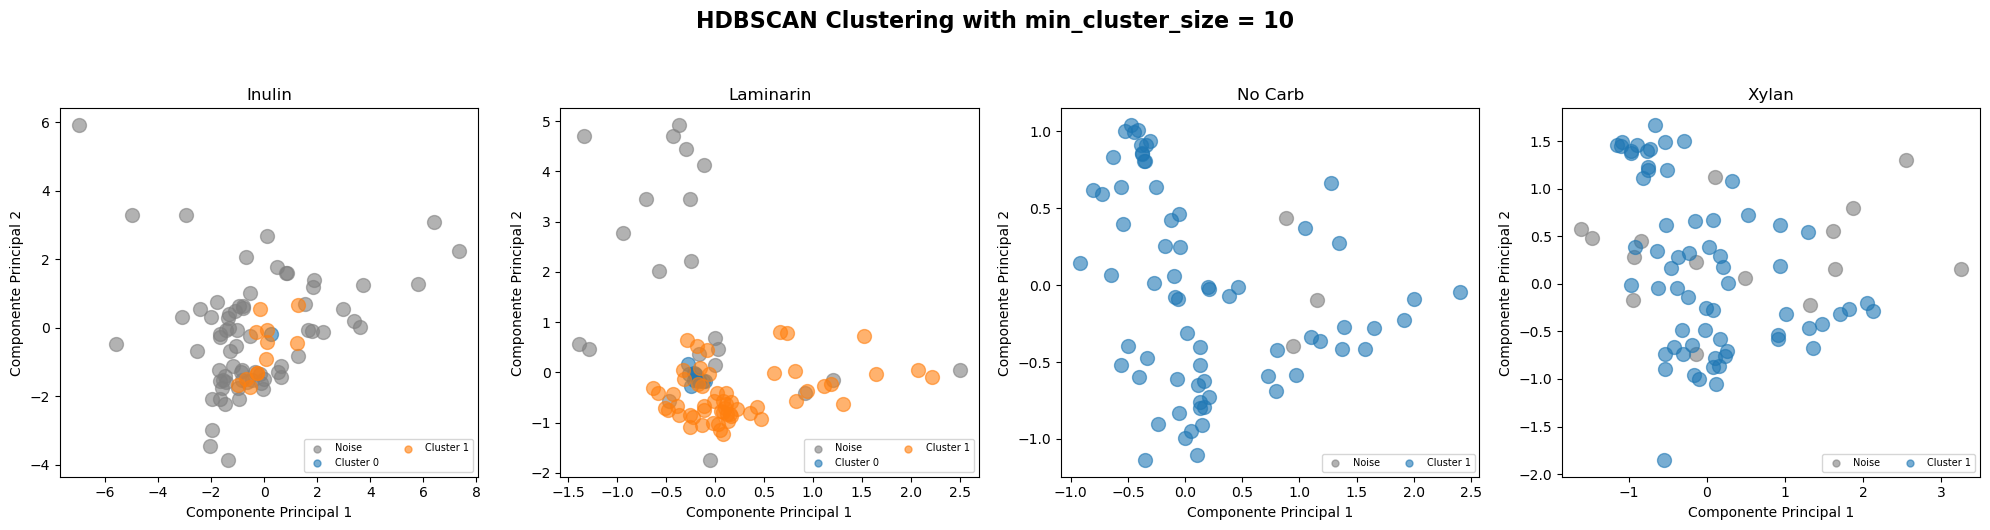

In [ ]:
t = ['Inulin', 'Laminarin', 'No Carb', 'Xylan']

for i, n in enumerate(n_hdbscan):
    
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) 
    axs = axs.flatten()
    fig.suptitle(f'HDBSCAN Clustering with min_cluster_size = {n}', fontsize=16, fontweight='bold', y=1.05)

    for j, treatment in enumerate(t):
        cluster = df_clusters_hbdscan[df_clusters_hbdscan['Treatments'] == treatment]['cluster_' + str(n)] 
        
        pc1 = pca[df_clusters_hbdscan['Treatments'] == treatment][:, 0]
        pc2 = pca[df_clusters_hbdscan['Treatments'] == treatment][:, 1]
        
        for k in np.unique(cluster):
            if k != -1:  # Ignore noise points (-1)
                axs[j].scatter(pc1[cluster == k], pc2[cluster == k], label=f'Cluster {k}', alpha=0.6, s=100)
            else:
                axs[j].scatter(pc1[cluster == k], pc2[cluster == k], label='Noise', alpha=0.6, s=100, color='gray')
        
        axs[j].set_title(f'{treatment}')
        axs[j].set_xlabel('Componente Principal 1')
        axs[j].set_ylabel('Componente Principal 2')
        if np.unique(cluster).size > 15:
            axs[j].legend(loc='lower right', fontsize=6, markerscale=0.5, ncol=3)
        else:
            axs[j].legend(loc='lower right', fontsize=7, markerscale=0.5, ncol=2)

    plt.tight_layout()
    plt.show()


## DBSCAN

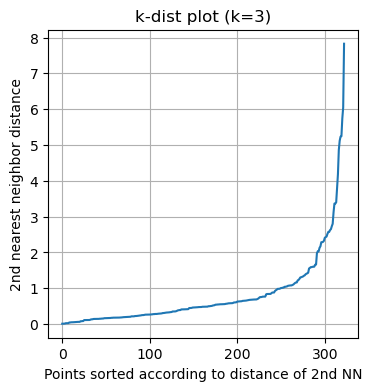

In [35]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(data_norm)
distances, indices = neighbors_fit.kneighbors(data_norm)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(4, 4))
plt.xlabel("Points sorted according to distance of 2nd NN")
plt.ylabel("2nd nearest neighbor distance")
plt.title("k-dist plot (k=3)")
plt.plot(distances)
plt.grid(True)
plt.show()

In [137]:
n_dbscan = [0.38, 0.39, 0.40, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60]

clusters_dbscan = pd.DataFrame()
df_clusters_dbscan = data_non_scaled.copy() 
for n in n_dbscan:
    dbscan = DBSCAN(eps=n)
    model = dbscan.fit(data_norm)
    clusters_dbscan['cluster_' + str(n)] = model.labels_
    score_dbscan = silhouette_score(data_norm, model.labels_)
    print(f'DBSCAN with {n}: Silhouette Score = {score_dbscan:.3f}')
    df_clusters_dbscan['cluster_' + str(n)] = model.labels_

df_clusters_dbscan
clusters_dbscan

DBSCAN with 0.38: Silhouette Score = -0.267
DBSCAN with 0.39: Silhouette Score = -0.267
DBSCAN with 0.4: Silhouette Score = -0.240
DBSCAN with 0.41: Silhouette Score = -0.240
DBSCAN with 0.42: Silhouette Score = -0.232
DBSCAN with 0.43: Silhouette Score = -0.228
DBSCAN with 0.44: Silhouette Score = -0.207
DBSCAN with 0.45: Silhouette Score = -0.186
DBSCAN with 0.46: Silhouette Score = -0.183
DBSCAN with 0.47: Silhouette Score = -0.176
DBSCAN with 0.48: Silhouette Score = -0.172
DBSCAN with 0.49: Silhouette Score = -0.169
DBSCAN with 0.5: Silhouette Score = -0.164
DBSCAN with 0.51: Silhouette Score = -0.145
DBSCAN with 0.52: Silhouette Score = -0.134
DBSCAN with 0.53: Silhouette Score = -0.131
DBSCAN with 0.54: Silhouette Score = -0.128
DBSCAN with 0.55: Silhouette Score = -0.122
DBSCAN with 0.56: Silhouette Score = -0.116
DBSCAN with 0.57: Silhouette Score = -0.116
DBSCAN with 0.58: Silhouette Score = -0.109
DBSCAN with 0.59: Silhouette Score = -0.104
DBSCAN with 0.6: Silhouette Score 

cluster_0.38  cluster_0.39  cluster_0.4  cluster_0.41  cluster_0.42  \
0              -1            -1           -1            -1            -1   
1              -1            -1           -1            -1            -1   
2              -1            -1           -1            -1            -1   
3              -1            -1           -1            -1            -1   
4              -1            -1           -1            -1            -1   
..            ...           ...          ...           ...           ...   
318            -1            -1           -1            -1            -1   
319            -1            -1           -1            -1            -1   
320            -1            -1           -1            -1            -1   
321            -1            -1           -1            -1            -1   
322            -1            -1           -1            -1            -1   

     cluster_0.43  cluster_0.44  cluster_0.45  cluster_0.46  cluster_0.47  \
0              -1            -1            -1            -1            -1   
1              -1            -1            -1            -1            -1   
2              -1            -1            -1            -1            -1   
3              -1            -1            -1            -1            -1   
4              -1            -1            -1            -1            -1   
..            ...           ...           ...           ...           ...   
318            -1            -1            -1            -1            -1   
319            -1            -1            -1            -1            -1   
320            -1            -1            -1            -1            -1   
321            -1            -1            -1            -1            -1   
322            -1            -1            -1            -1            -1   

     ...  cluster_0.51  cluster_0.52  cluster_0.53  cluster_0.54  \
0    ...            -1            -1            -1            -1   
1    ...            -1            -1            -1            -1   
2    ...            -1            -1            -1            -1   
3    ...            -1            -1            -1            -1   
4    ...            -1            -1            -1            -1   
..   ...           ...           ...           ...           ...   
318  ...            -1            -1            -1            -1   
319  ...            -1            -1            -1            -1   
320  ...            -1            -1            -1            -1   
321  ...            -1            -1            -1            -1   
322  ...            -1            -1            -1            -1   

     cluster_0.55  cluster_0.56  cluster_0.57  cluster_0.58  cluster_0.59  \
0              -1            -1            -1            -1            -1   
1              -1            -1            -1            -1            -1   
2              -1            -1            -1            -1            -1   
3              -1            -1            -1            -1            -1   
4              -1            -1            -1            -1            -1   
..            ...           ...           ...           ...           ...   
318            -1            -1            -1            -1            -1   
319            -1            -1            -1            -1            -1   
320            -1            -1            -1            -1            -1   
321            -1            -1            -1            -1            -1   
322            -1            -1            -1            -1            -1   

     cluster_0.6  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  
..           ...  
318            1  
319           -1  
320           -1  
321           -1  
322           -1  

[323 rows x 23 columns]

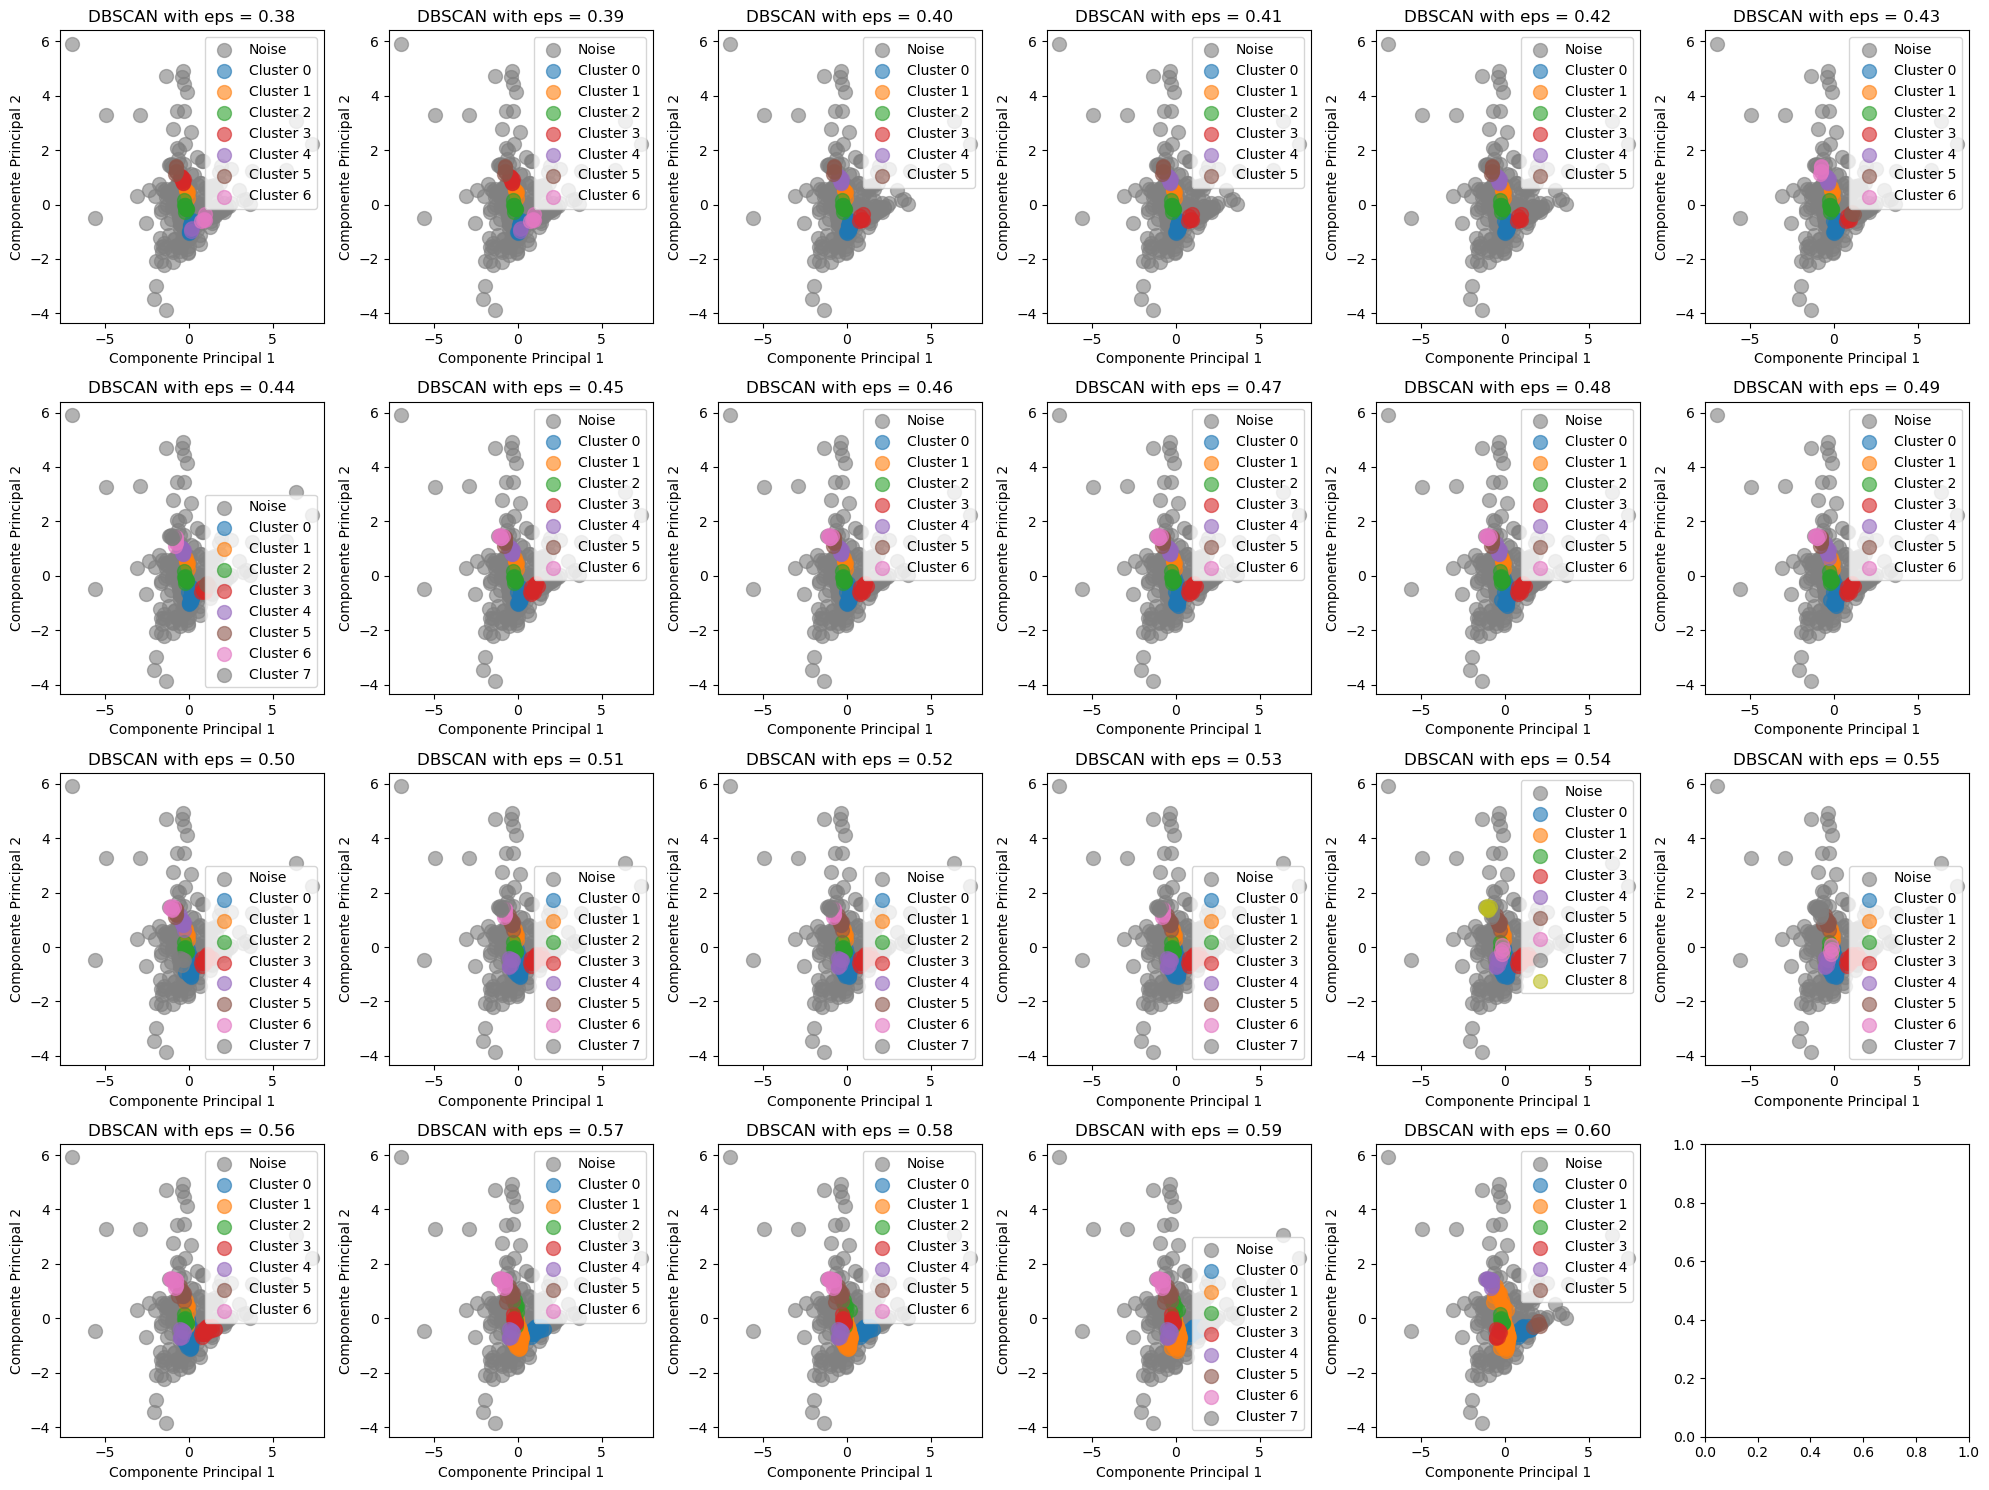

In [141]:
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))  
axs = axs.flatten()

for i, eps in enumerate(n_dbscan):
    dbscan = DBSCAN(eps=eps)
    pc1 = pca[:, 0]
    pc2 = pca[:, 1]
    model = dbscan.fit(data_norm)
    
    cluster = model.labels_

    for j in np.unique(cluster):
        if j != -1:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Cluster {j}', alpha=0.6, s=100)
        else:
            axs[i].scatter(pc1[cluster == j], pc2[cluster == j], label=f'Noise', alpha=0.6, s=100, color='gray')
    
    axs[i].set_title(f'DBSCAN with eps = {eps:.2f}')
    axs[i].set_xlabel('Componente Principal 1')
    axs[i].set_ylabel('Componente Principal 2')
    axs[i].legend()

plt.tight_layout()
plt.show()

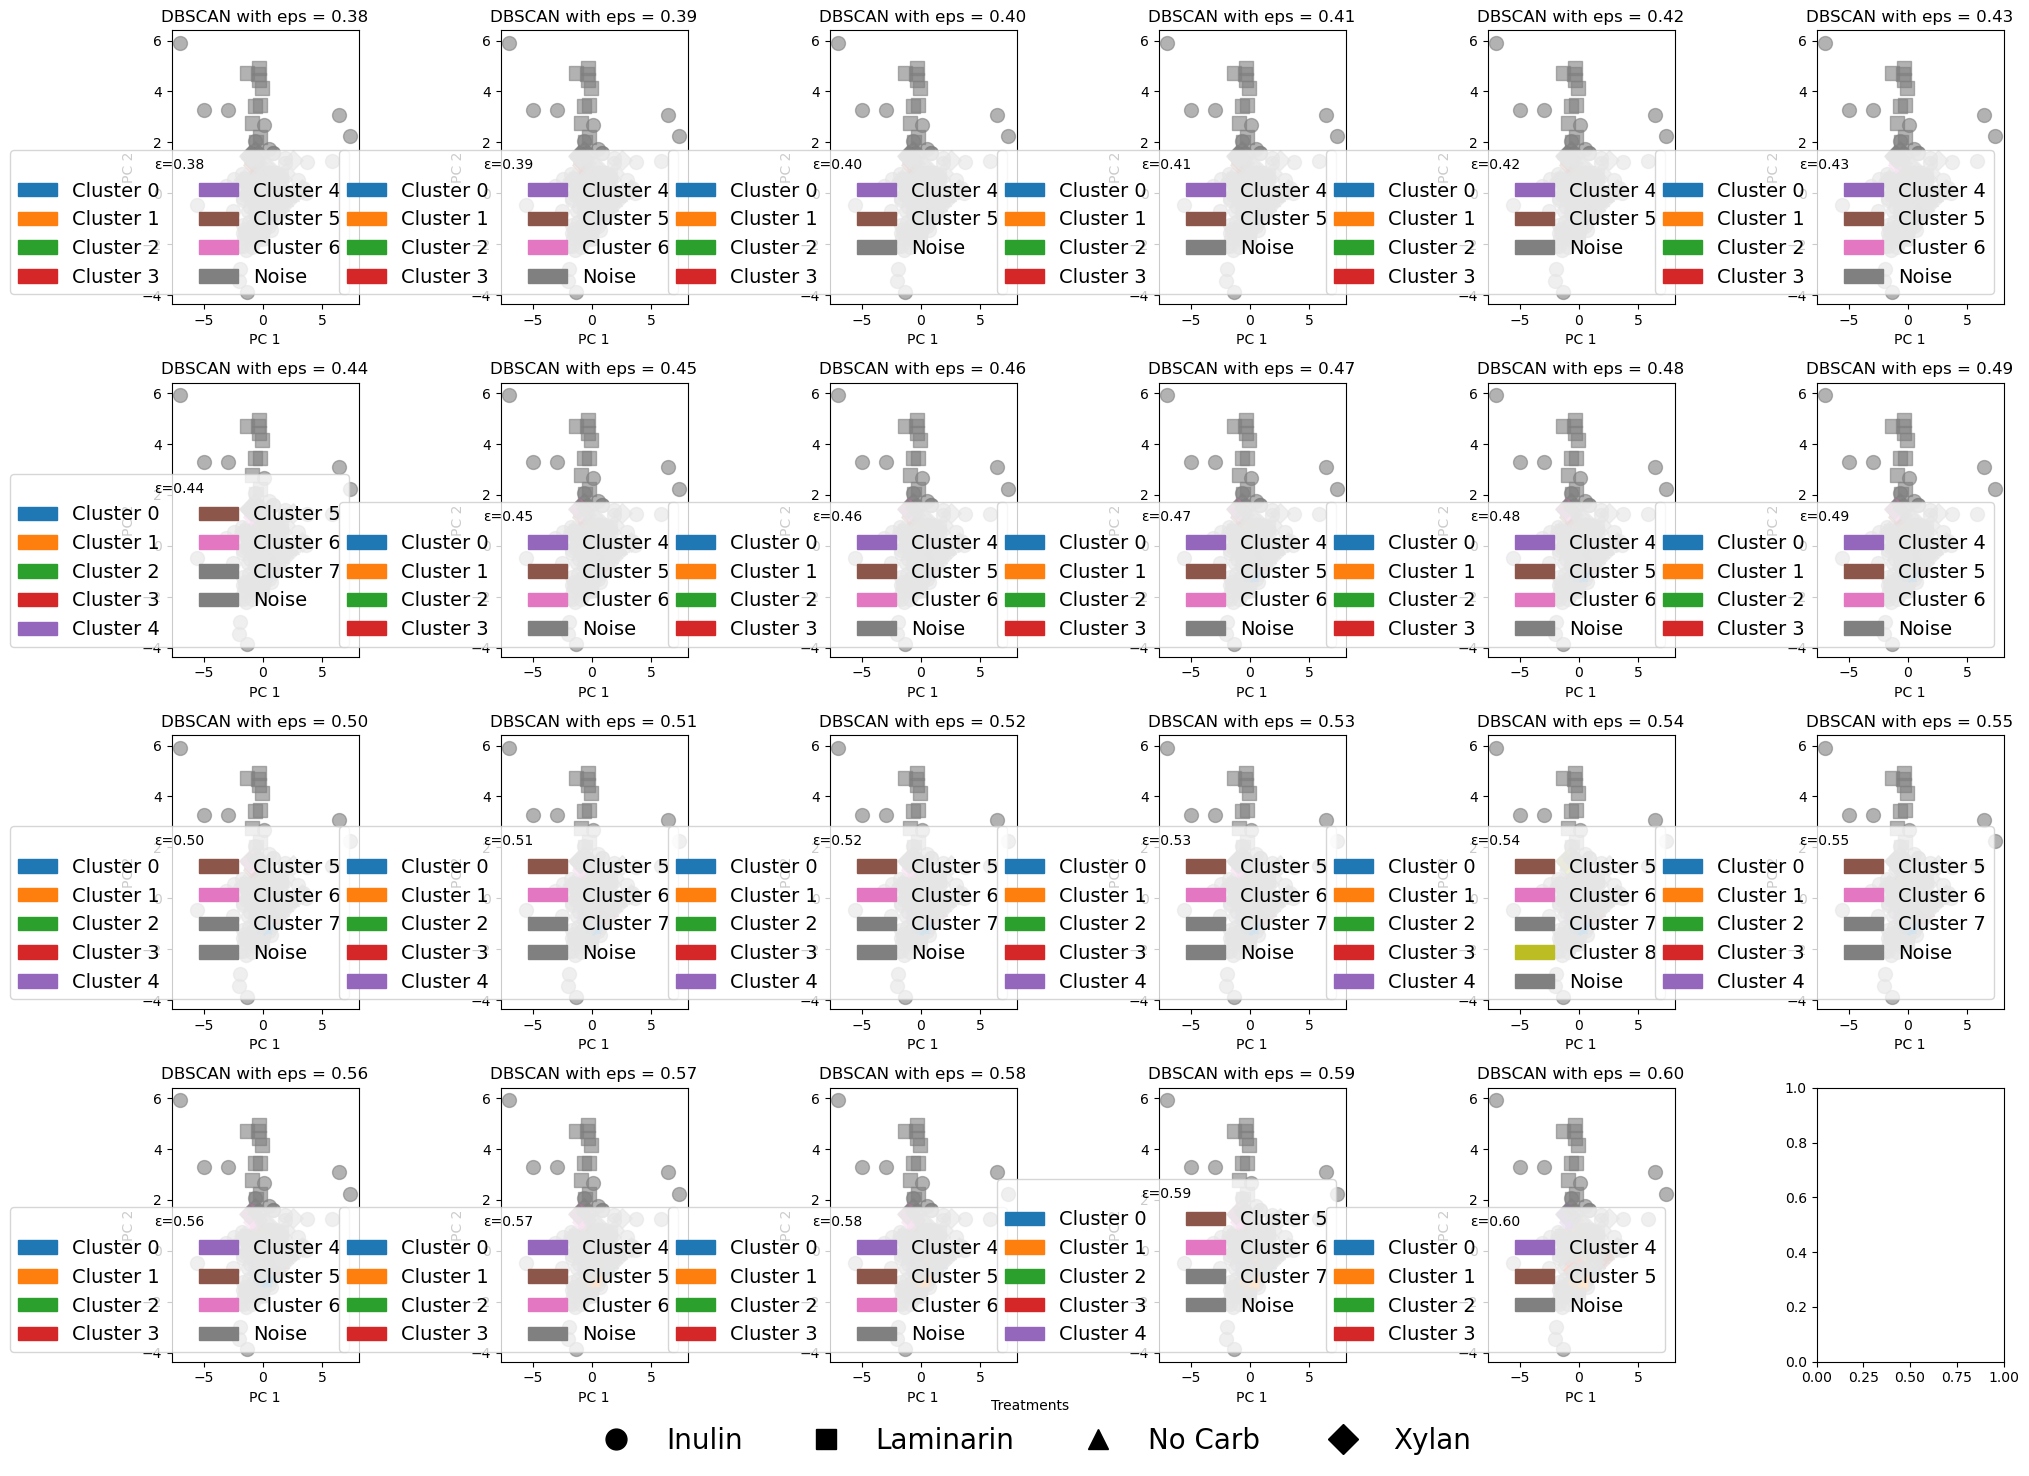

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.cluster import DBSCAN

marker_shapes = {'Inulin': 'o', 'Laminarin': 's', 'No Carb': '^', 'Xylan': 'D'}
treatments = list(marker_shapes.keys())

fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 15))
axs = axs.flatten()

# Precompute PC coords
pc1 = pca[:, 0]
pc2 = pca[:, 1]

for i, eps in enumerate(n_dbscan):
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(data_norm)

    # unique clusters (excluding noise)
    uniq = sorted([lab for lab in np.unique(labels) if lab != -1])
    base_colors = plt.cm.tab10.colors
    cluster_to_color = {c: base_colors[idx % len(base_colors)]
                        for idx, c in enumerate(uniq)}

    # plot by treatment & cluster
    for tr in treatments:
        m = marker_shapes[tr]
        mask_tr = df_clusters_hbdscan['Treatments'] == tr
        # clusters
        for c in uniq:
            sel = (labels == c) & mask_tr
            axs[i].scatter(pc1[sel], pc2[sel],
                           color=cluster_to_color[c],
                           marker=m,
                           s=100, alpha=0.6)
        # noise
        sel_noise = (labels == -1) & mask_tr
        axs[i].scatter(pc1[sel_noise], pc2[sel_noise],
                       color='gray',
                       marker=m,
                       s=100, alpha=0.6)

    # per‐subplot legend: clusters only
    handles = [Patch(color=cluster_to_color[c], label=f'Cluster {c}')
               for c in uniq]
    if -1 in labels:
        handles.append(Patch(color='gray', label='Noise'))

    axs[i].legend(handles=handles,
                  title=f'ε={eps:.2f}',
                  loc='lower right',
                  fontsize=14,
                  markerscale=1.2,
                  ncol=2)

    axs[i].set_title(f'DBSCAN with eps = {eps:.2f}')
    axs[i].set_xlabel('PC 1')
    axs[i].set_ylabel('PC 2')

# make room at bottom for the global legend
plt.tight_layout(rect=[0, 0.05, 1, 1])

# global legend for treatments (shapes only), centered below
handles_treat = [
    Line2D([0], [0],
           marker=marker_shapes[t], color='black',
           linestyle='None', markersize=15, label=t)
    for t in treatments
]
fig.legend(handles=handles_treat,
           title='Treatments',
           loc='lower center',
           bbox_to_anchor=(0.5, 0.01),
           ncol=len(treatments),
           frameon=False,
           fontsize=20,
           title_fontsize='medium')

plt.show()


## GMM

Text(0, 0.5, 'AIC')

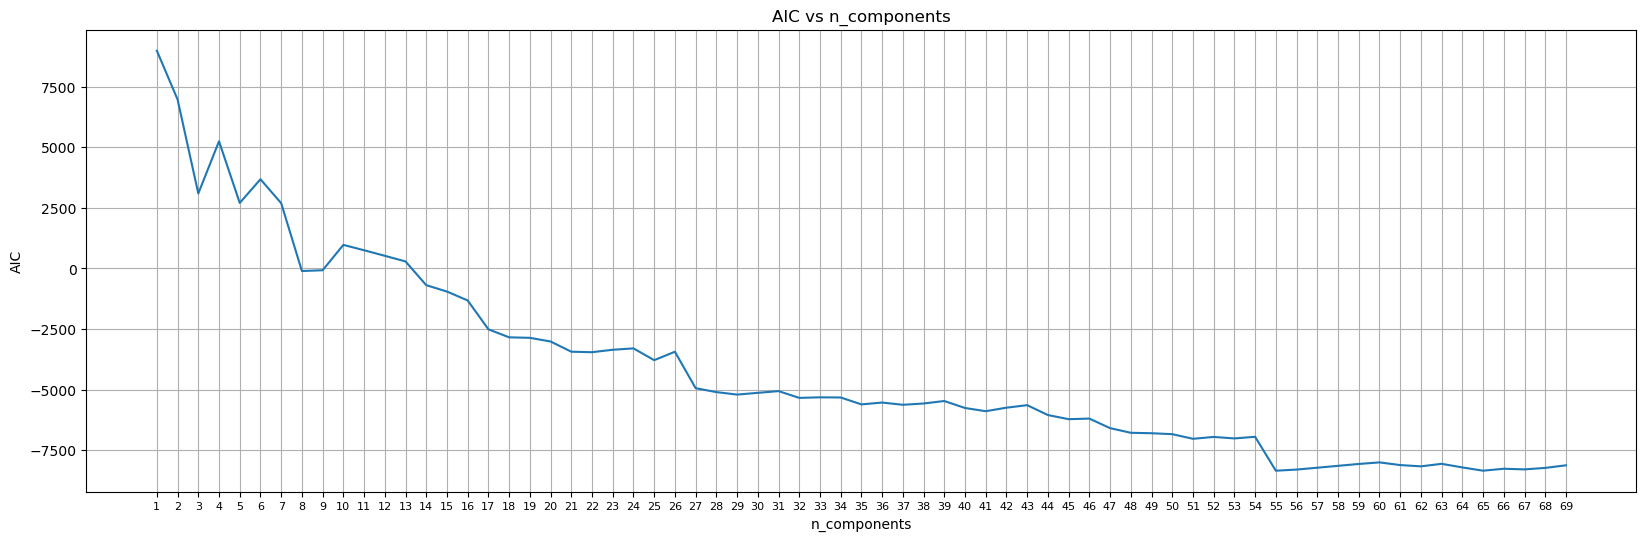

In [142]:
n_components = np.arange(1,70)
models = [GaussianMixture(n, covariance_type='full', random_state=42).fit(data_norm) for n in n_components]
AICS = [m.aic(data_norm) for m in models]


plt.figure(figsize=(20, 6))
plt.title('AIC vs n_components')
plt.plot(n_components, AICS)
plt.xticks(n_components,size=8)
plt.grid(True)
plt.xlabel('n_components');
plt.ylabel('AIC')

In [143]:
aics = np.asarray([m.aic(data_norm) for m in models])
kmin = np.where(aics == np.amin(aics))[0][0]
print(kmin)

54


In [145]:
#55

clusters_dbscan = pd.DataFrame()
df_clusters_dbscan = data_non_scaled.copy()  # Copia el dataframe original para agregar los clusters
for n in n_dbscan:
    dbscan = DBSCAN(eps=n)
    model = dbscan.fit(data_norm)
    clusters_dbscan['cluster_' + str(n)] = model.labels_
    score_dbscan = silhouette_score(data_norm, model.labels_)
    print(f'DBSCAN with {n}: Silhouette Score = {score_dbscan:.3f}')
    df_clusters_dbscan['cluster_' + str(n)] = kmeans.labels_  # Agrega los clusters al dataframe original


DBSCAN with 0.38: Silhouette Score = -0.267
DBSCAN with 0.39: Silhouette Score = -0.267
DBSCAN with 0.4: Silhouette Score = -0.240
DBSCAN with 0.41: Silhouette Score = -0.240
DBSCAN with 0.42: Silhouette Score = -0.232
DBSCAN with 0.43: Silhouette Score = -0.228
DBSCAN with 0.44: Silhouette Score = -0.207
DBSCAN with 0.45: Silhouette Score = -0.186
DBSCAN with 0.46: Silhouette Score = -0.183
DBSCAN with 0.47: Silhouette Score = -0.176
DBSCAN with 0.48: Silhouette Score = -0.172
DBSCAN with 0.49: Silhouette Score = -0.169
DBSCAN with 0.5: Silhouette Score = -0.164
DBSCAN with 0.51: Silhouette Score = -0.145
DBSCAN with 0.52: Silhouette Score = -0.134
DBSCAN with 0.53: Silhouette Score = -0.131
DBSCAN with 0.54: Silhouette Score = -0.128
DBSCAN with 0.55: Silhouette Score = -0.122
DBSCAN with 0.56: Silhouette Score = -0.116
DBSCAN with 0.57: Silhouette Score = -0.116
DBSCAN with 0.58: Silhouette Score = -0.109
DBSCAN with 0.59: Silhouette Score = -0.104
DBSCAN with 0.6: Silhouette Score 

In [146]:
clusters_gmm = pd.DataFrame()
df_clusters_gmm = data_non_scaled.copy() 
gmm = GaussianMixture(kmin+1, covariance_type='full')
model = gmm.fit(data_norm)
model.predict(data_norm)
clusters_gmm['cluster'] = model.predict(data_norm)
df_clusters_gmm['cluster'] = model.predict(data_norm)
print(df_clusters_gmm.value_counts('cluster').sort_index())

score_gmm = silhouette_score(data_norm, clusters_gmm)

cluster
0      7
1     19
2     11
3      3
4      5
5      1
6      1
7      2
8      9
9     15
10     8
11    14
12     1
13    10
14    10
15    12
16    17
17     1
18     1
19     2
20     1
21     1
22     1
23     1
24     1
25     1
26    23
27     4
28     3
29    13
30     1
31    16
32     4
33    15
34     2
35     4
36     1
37     1
38     1
39     1
40     1
41     5
42     6
43    13
44     3
45    11
46     2
47     1
48     1
49    11
50     2
51     8
52    12
53     2
54     1
Name: count, dtype: int64


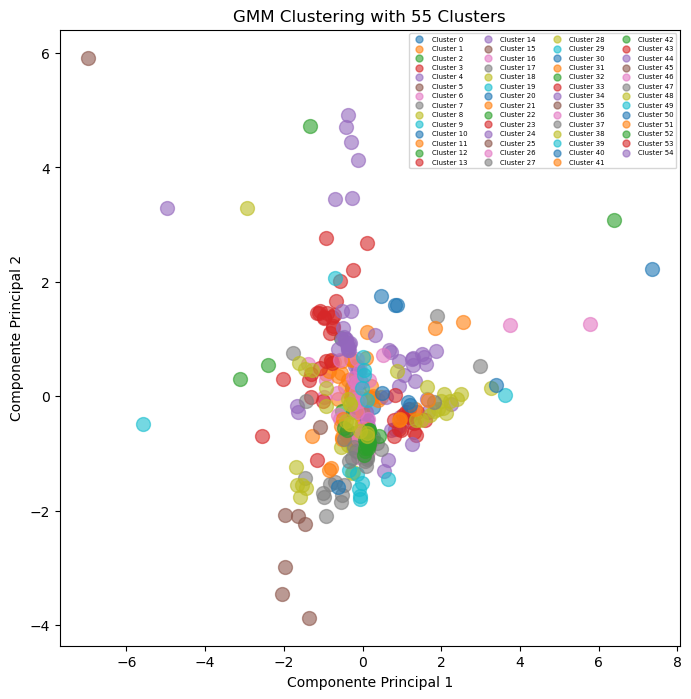

In [151]:
gmm = GaussianMixture(n_components=kmin + 1, covariance_type='full')
model = gmm.fit(data_norm)
clusters_gmm = model.predict(data_norm)
pc1 = pca[:, 0]
pc2 = pca[:, 1]
df_clusters_gmm = data_non_scaled.assign(cluster=clusters_gmm)

plt.figure(figsize=(8, 8))

for j in np.unique(clusters_gmm):
    plt.scatter(pc1[clusters_gmm == j], pc2[clusters_gmm == j], label=f'Cluster {j}', alpha=0.6, s=100)

plt.title(f'GMM Clustering with {kmin + 1} Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(loc='upper right', fontsize=5, markerscale=0.5, ncol=4)

plt.show()

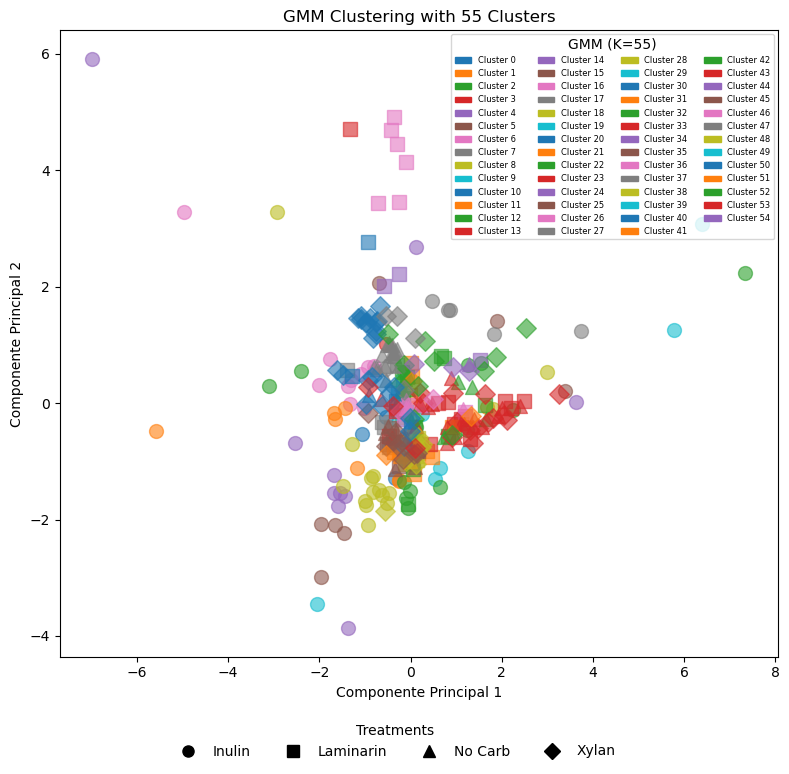

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from sklearn.mixture import GaussianMixture

# --- same marker mapping ---
marker_shapes = {'Inulin': 'o', 'Laminarin': 's', 'No Carb': '^', 'Xylan': 'D'}
treatments = list(marker_shapes.keys())

# --- fit GMM ---
gmm = GaussianMixture(n_components=kmin + 1, covariance_type='full')
model = gmm.fit(data_norm)
clusters_gmm = model.predict(data_norm)

# append clusters (and assume 'Treatments' is already a column in your data)
df_clusters_gmm = data_non_scaled.assign(cluster=clusters_gmm)

pc1 = pca[:, 0]
pc2 = pca[:, 1]

fig = plt.figure(figsize=(8, 8))

# determine unique clusters
uniq = sorted(np.unique(clusters_gmm))
base_colors = plt.cm.tab10.colors
cluster_to_color = {c: base_colors[idx % len(base_colors)]
                    for idx, c in enumerate(uniq)}

# plot by treatment & cluster
for tr in treatments:
    m = marker_shapes[tr]
    mask_tr = df_clusters_gmm['Treatments'] == tr
    for c in uniq:
        sel = (clusters_gmm == c) & mask_tr
        plt.scatter(pc1[sel], pc2[sel],
                    color=cluster_to_color[c],
                    marker=m,
                    s=100, alpha=0.6)

# build the per‐plot (color) legend
handles_clusters = [Patch(color=cluster_to_color[c], label=f'Cluster {c}')
                    for c in uniq]
plt.legend(handles=handles_clusters,
           title=f'GMM (K={kmin+1})',
           loc='upper right',
           fontsize=6,
           markerscale=0.5,
           ncol=4)

plt.title(f'GMM Clustering with {kmin + 1} Clusters')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')


# leave more space at bottom for legend
plt.tight_layout(rect=[0, 0.1, 1, 1])

# draw the treatment‐shape legend
handles_treat = [
    Line2D([0], [0], marker=marker_shapes[t], color='black',
           linestyle='None', markersize=8, label=t)
    for t in treatments
]
fig.legend(handles=handles_treat,
           title='Treatments',
           loc='lower center',
           bbox_to_anchor=(0.5, 0.03),
           ncol=len(treatments),
           frameon=False,
           fontsize='medium',
           title_fontsize='medium')

plt.show()